In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sqlalchemy import create_engine, inspect
from utils.database_utils import *
from utils.config_utils import *
from constants import *

db_config = get_db_config(read_config(CONFIG_FILE_PATH))
# Create SQLAlchemy engine
engine = connect(db_config)

# Connect and Inspect
inspector = inspect(engine)

# Get table names
table_names = inspector.get_table_names()
table_names

Connection to PostgreSQL successful


['routes_table',
 'routes_weather',
 'drivers_table',
 'trucks_table',
 'city_weather',
 'truck_schedule_table',
 'traffic_table']

In [3]:
import hopsworks
import pandas as pd

project = hopsworks.login(api_key_value = 'S2PoqNKdqdQ2EXNW.hybyaHPCvA5Jx6uoeL55fG2X5u3ogs3yUxcPmkGUKOc6DsNapeRmD3L6PlpefmOz')
fs = project.get_feature_store()

feature_groups = [table + '_fg' for table in table_names]

feature_dataframes = {}

# Loop through each feature group and fetch the data
for fg_name in feature_groups:
    # Get the feature group object
    fg = fs.get_feature_group(fg_name, version=1)  # Ensure you use the correct version
    
    # Fetch the data as a Pandas DataFrame
    df = fg.read()
    
    # Store in dictionary
    feature_dataframes[fg_name] = df

# Now you have a dictionary of DataFrames, where the key is the feature group name
print(feature_dataframes)

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1022104
Connected. Call `.close()` to terminate connection gracefully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.61s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (5.66s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.55s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.46s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.73s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.65s) 
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (15.19s) 
{'routes_table_fg':         id    route_id   origin_id destination_id  distance  average_hours  \
0      522  R-a4b1265c  C-c7cacd1d     C-90e30162    873.53          17.47   
1     1253  R-4

In [4]:
city_weather_df = feature_dataframes['city_weather_fg']
drivers_df  = feature_dataframes['drivers_table_fg']
routes_df  = feature_dataframes['routes_table_fg']
routes_weather_df  = feature_dataframes['routes_weather_fg']
traffic_df  = feature_dataframes['traffic_table_fg']
truck_schedule_df  = feature_dataframes['truck_schedule_table_fg']
trucks_df  = feature_dataframes['trucks_table_fg']

# Data Exploration

## City Weather Analysis

In [5]:
city_weather_df

,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,52494,C-841ebdcb,2019-01-27 00:00:00+00:00,500,55,5,Moderate or heavy rain shower,0.0,84,5,1022,0,0,0,0,2024-09-20 00:00:00+00:00
1,26247,C-f5ed4c15,2019-02-06 00:00:00+00:00,1400,5,6,Sunny,0.0,80,6,1026,0,0,0,0,2024-09-20 00:00:00+00:00
2,7966,C-731988ba,2019-01-10 00:00:00+00:00,2100,46,3,Clear,0.0,57,6,1016,0,0,0,0,2024-09-20 00:00:00+00:00
3,31016,C-9bbf5d8a,2019-01-06 00:00:00+00:00,700,72,6,Sunny,0.0,61,6,1014,0,0,0,0,2024-09-20 00:00:00+00:00
4,11190,C-c7cacd1d,2019-01-07 00:00:00+00:00,500,21,8,Cloudy,0.0,60,6,1033,0,0,0,0,2024-09-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,40378,C-2aaf0e1a,2019-01-28 00:00:00+00:00,900,19,2,Sunny,0.0,66,6,1021,0,0,0,0,2024-09-20 00:00:00+00:00
55172,18331,C-e5bfb4e5,2019-01-28 00:00:00+00:00,1800,1,10,Cloudy,0.0,90,6,1015,0,0,0,0,2024-09-20 00:00:00+00:00
55173,5153,C-451776b7,2019-01-31 00:00:00+00:00,1600,57,8,Partly cloudy,0.0,81,6,1013,0,0,0,0,2024-09-20 00:00:00+00:00
55174,18404,C-e5bfb4e5,2019-01-31 00:00:00+00:00,1900,-9,3,Cloudy,0.0,65,6,1028,0,0,0,0,2024-09-20 00:00:00+00:00


In [6]:
city_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55176 entries, 0 to 55175
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               55176 non-null  int64              
 1   city_id          55176 non-null  object             
 2   date             55176 non-null  datetime64[us, UTC]
 3   hour             55176 non-null  int64              
 4   temp             55176 non-null  int64              
 5   wind_speed       55176 non-null  int64              
 6   description      55176 non-null  object             
 7   precip           55176 non-null  float64            
 8   humidity         55176 non-null  int64              
 9   visibility       55176 non-null  int64              
 10  pressure         55176 non-null  int64              
 11  chanceofrain     55176 non-null  int64              
 12  chanceoffog      55176 non-null  int64              
 13  chanceofsnow    

In [7]:
city_weather_df.describe()

,id,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.000000,55176.0,55176.0,55176.0,55176.0
mean,27588.500000,1150.000000,36.896169,7.888647,0.003614,70.808141,5.168878,1019.413404,0.0,0.0,0.0,0.0
std,15928.083563,692.224928,21.766273,4.349798,0.023185,21.078367,1.639954,8.543195,0.0,0.0,0.0,0.0
min,1.000000,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,13794.750000,575.000000,23.000000,5.000000,0.000000,57.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,27588.500000,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,41382.250000,1725.000000,48.000000,11.000000,0.000000,88.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,55176.000000,2300.000000,104.000000,33.000000,0.800000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [8]:
""" In Components """
# Drop chance columns as all are 0
# city_weather_df = city_weather_df.drop(columns=['chanceofrain', 'chanceofsnow', 'chanceoffog', 'chanceofthunder'])


' In Components '

In [9]:
# Drop these as 75% of the data is same
# city_weather_df = city_weather_df.drop(columns=['precip', 'visibility'])

In [10]:
city_weather_df

,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,52494,C-841ebdcb,2019-01-27 00:00:00+00:00,500,55,5,Moderate or heavy rain shower,0.0,84,5,1022,0,0,0,0,2024-09-20 00:00:00+00:00
1,26247,C-f5ed4c15,2019-02-06 00:00:00+00:00,1400,5,6,Sunny,0.0,80,6,1026,0,0,0,0,2024-09-20 00:00:00+00:00
2,7966,C-731988ba,2019-01-10 00:00:00+00:00,2100,46,3,Clear,0.0,57,6,1016,0,0,0,0,2024-09-20 00:00:00+00:00
3,31016,C-9bbf5d8a,2019-01-06 00:00:00+00:00,700,72,6,Sunny,0.0,61,6,1014,0,0,0,0,2024-09-20 00:00:00+00:00
4,11190,C-c7cacd1d,2019-01-07 00:00:00+00:00,500,21,8,Cloudy,0.0,60,6,1033,0,0,0,0,2024-09-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,40378,C-2aaf0e1a,2019-01-28 00:00:00+00:00,900,19,2,Sunny,0.0,66,6,1021,0,0,0,0,2024-09-20 00:00:00+00:00
55172,18331,C-e5bfb4e5,2019-01-28 00:00:00+00:00,1800,1,10,Cloudy,0.0,90,6,1015,0,0,0,0,2024-09-20 00:00:00+00:00
55173,5153,C-451776b7,2019-01-31 00:00:00+00:00,1600,57,8,Partly cloudy,0.0,81,6,1013,0,0,0,0,2024-09-20 00:00:00+00:00
55174,18404,C-e5bfb4e5,2019-01-31 00:00:00+00:00,1900,-9,3,Cloudy,0.0,65,6,1028,0,0,0,0,2024-09-20 00:00:00+00:00


In [11]:
# city_weather_df['hour'] = city_weather_df['hour'] // 100

# Step 3: Create a new 'timestamp' column by adding hours to the date
# city_weather_df['date'] = city_weather_df['date'] + pd.to_timedelta(city_weather_df['hour'] // 100, unit='h')


In [12]:
# city_weather_df = city_weather_df.drop(columns=['hour'])

In [13]:
city_weather_df

,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,52494,C-841ebdcb,2019-01-27 00:00:00+00:00,500,55,5,Moderate or heavy rain shower,0.0,84,5,1022,0,0,0,0,2024-09-20 00:00:00+00:00
1,26247,C-f5ed4c15,2019-02-06 00:00:00+00:00,1400,5,6,Sunny,0.0,80,6,1026,0,0,0,0,2024-09-20 00:00:00+00:00
2,7966,C-731988ba,2019-01-10 00:00:00+00:00,2100,46,3,Clear,0.0,57,6,1016,0,0,0,0,2024-09-20 00:00:00+00:00
3,31016,C-9bbf5d8a,2019-01-06 00:00:00+00:00,700,72,6,Sunny,0.0,61,6,1014,0,0,0,0,2024-09-20 00:00:00+00:00
4,11190,C-c7cacd1d,2019-01-07 00:00:00+00:00,500,21,8,Cloudy,0.0,60,6,1033,0,0,0,0,2024-09-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,40378,C-2aaf0e1a,2019-01-28 00:00:00+00:00,900,19,2,Sunny,0.0,66,6,1021,0,0,0,0,2024-09-20 00:00:00+00:00
55172,18331,C-e5bfb4e5,2019-01-28 00:00:00+00:00,1800,1,10,Cloudy,0.0,90,6,1015,0,0,0,0,2024-09-20 00:00:00+00:00
55173,5153,C-451776b7,2019-01-31 00:00:00+00:00,1600,57,8,Partly cloudy,0.0,81,6,1013,0,0,0,0,2024-09-20 00:00:00+00:00
55174,18404,C-e5bfb4e5,2019-01-31 00:00:00+00:00,1900,-9,3,Cloudy,0.0,65,6,1028,0,0,0,0,2024-09-20 00:00:00+00:00


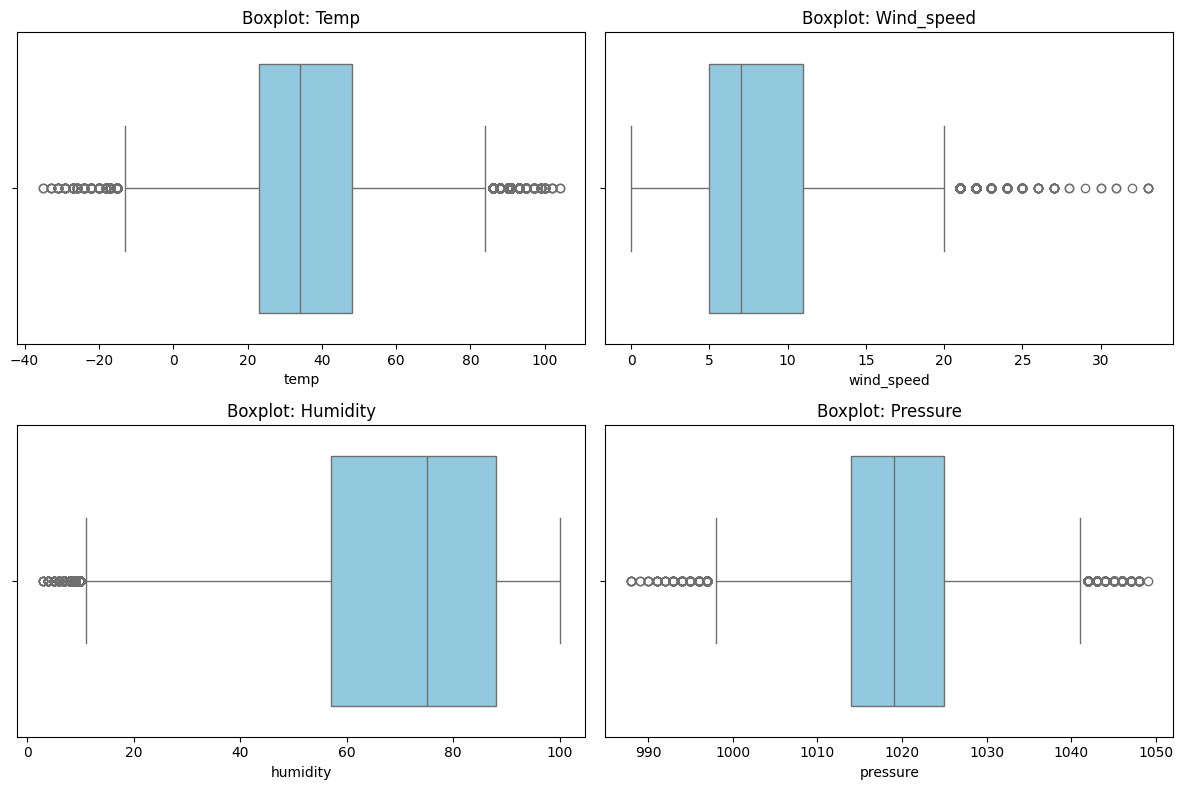

In [14]:
integer_columns = ['temp', 'wind_speed', 'humidity', 'pressure']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=city_weather_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

<details>
    <summary>Graph Analysis and recommendations</summary>

Analysis

1. **Temperature Boxplot**:
   - The temperature has a wide range, with most values concentrated between 20 and 60 degrees.
   - There are significant outliers on both sides, particularly in the negative temperature range.

2. **Wind Speed Boxplot**:
   - Wind speed shows a more compact distribution, with most values ranging between 5 and 15 mph.
   - There are several outliers on the higher end (above 20 mph), indicating occasional extreme wind speeds.

3. **Humidity Boxplot**:
   - Humidity is distributed between 40% and 100%, with most values lying around 60%-90%.
   - There are outliers on the lower end, with some humidity values close to 0%.

4. **Pressure Boxplot**:
   - Pressure is generally well-distributed between 1000 and 1030, with the median close to 1020.
   - There are a few low and high outliers, but the majority of the data is within a tight range.

Recommendations

1. **Temperature**:
   - The presence of extreme outliers (both negative and high temperatures) might skew some models. Consider capping the outliers or treating them with robust scaling techniques.
   
2. **Wind Speed**:
   - The outliers in wind speed can be retained if they represent rare but significant events (like storms). Alternatively, trimming the higher outliers might help build more stable models if those events are not of interest.

3. **Humidity**:
   - The extreme low outliers should be investigated to ensure they are not data errors. Depending on the analysis needs, those could be removed or imputed.

4. **Pressure**:
   - Pressure data has fewer outliers compared to other features. However, low and high pressure outliers could be treated if they represent anomalies, or they can be capped to ensure model robustness.
   
5. **General**:
   - For all features, consider using transformations or outlier handling methods such as IQR-based filtering, capping extreme values, or applying normalization techniques to improve model performance.

</details>

In [15]:
import numpy as np
from scipy import stats

# Z-Score method to detect outliers
def z_score_outliers(column):
    z_scores = np.abs(stats.zscore(city_weather_df[column]))
    outliers = city_weather_df[z_scores > 3]
    return outliers

# IQR method to detect outliers
def iqr_outliers(column):
    Q1 = city_weather_df[column].quantile(0.25)
    Q3 = city_weather_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = city_weather_df[(city_weather_df[column] < lower_bound) | (city_weather_df[column] > upper_bound)]
    return outliers

# Detecting outliers in 'age', 'experience', 'ratings', and 'average_speed_mph'
columns_to_check = ['temp', 'wind_speed', 'humidity', 'pressure']

outliers_z = {column: z_score_outliers(column) for column in columns_to_check}
outliers_iqr = {column: iqr_outliers(column) for column in columns_to_check}

# Displaying results
# pd.concat(outliers_z.values()).drop_duplicates()
pd.concat(outliers_iqr.values()).drop_duplicates()


,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
24,37125,C-fc66f0ab,2019-01-30 00:00:00+00:00,2000,-29,12,Partly cloudy,0.0,72,6,1029,0,0,0,0,2024-09-20 00:00:00+00:00
27,49623,C-2e349ccd,2019-02-14 00:00:00+00:00,1400,95,8,Sunny,0.0,14,6,1009,0,0,0,0,2024-09-20 00:00:00+00:00
233,23728,C-f8f01604,2019-01-23 00:00:00+00:00,1500,97,5,Sunny,0.0,10,6,1008,0,0,0,0,2024-09-20 00:00:00+00:00
264,10640,C-a9f2c329,2019-01-30 00:00:00+00:00,700,-24,14,Overcast,0.0,63,6,1032,0,0,0,0,2024-09-20 00:00:00+00:00
323,40884,C-34ae77b0,2019-01-03 00:00:00+00:00,1100,90,6,Sunny,0.0,31,6,1011,0,0,0,0,2024-09-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54695,43990,C-b5282c3b,2019-02-09 00:00:00+00:00,2100,16,6,Partly cloudy,0.0,85,6,1042,0,0,0,0,2024-09-20 00:00:00+00:00
54842,19580,C-3dbd8b2e,2019-02-03 00:00:00+00:00,1900,39,5,Light rain,0.0,84,5,996,0,0,0,0,2024-09-20 00:00:00+00:00
54857,53909,C-e6dcda92,2019-02-09 00:00:00+00:00,400,10,10,Clear,0.0,75,6,1042,0,0,0,0,2024-09-20 00:00:00+00:00
55078,55017,C-594514f8,2019-02-09 00:00:00+00:00,800,16,4,Light snow,0.0,70,6,1047,0,0,0,0,2024-09-20 00:00:00+00:00


In [16]:
city_weather_df = city_weather_df.drop(pd.concat(outliers_iqr.values()).drop_duplicates().index)

In [17]:
city_weather_df

,id,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,52494,C-841ebdcb,2019-01-27 00:00:00+00:00,500,55,5,Moderate or heavy rain shower,0.0,84,5,1022,0,0,0,0,2024-09-20 00:00:00+00:00
1,26247,C-f5ed4c15,2019-02-06 00:00:00+00:00,1400,5,6,Sunny,0.0,80,6,1026,0,0,0,0,2024-09-20 00:00:00+00:00
2,7966,C-731988ba,2019-01-10 00:00:00+00:00,2100,46,3,Clear,0.0,57,6,1016,0,0,0,0,2024-09-20 00:00:00+00:00
3,31016,C-9bbf5d8a,2019-01-06 00:00:00+00:00,700,72,6,Sunny,0.0,61,6,1014,0,0,0,0,2024-09-20 00:00:00+00:00
4,11190,C-c7cacd1d,2019-01-07 00:00:00+00:00,500,21,8,Cloudy,0.0,60,6,1033,0,0,0,0,2024-09-20 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,40378,C-2aaf0e1a,2019-01-28 00:00:00+00:00,900,19,2,Sunny,0.0,66,6,1021,0,0,0,0,2024-09-20 00:00:00+00:00
55172,18331,C-e5bfb4e5,2019-01-28 00:00:00+00:00,1800,1,10,Cloudy,0.0,90,6,1015,0,0,0,0,2024-09-20 00:00:00+00:00
55173,5153,C-451776b7,2019-01-31 00:00:00+00:00,1600,57,8,Partly cloudy,0.0,81,6,1013,0,0,0,0,2024-09-20 00:00:00+00:00
55174,18404,C-e5bfb4e5,2019-01-31 00:00:00+00:00,1900,-9,3,Cloudy,0.0,65,6,1028,0,0,0,0,2024-09-20 00:00:00+00:00


## Drivers Table Analysis


In [18]:
drivers_df

,id,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,1253,25ef512e-5,Charles Hatfield,male,35,2,conservative,8,21302712,46.87,2024-09-19 00:00:00+00:00
1,486,7b6fcc3d-2,Luis Anderson,male,45,10,conservative,3,30203269,38.29,2024-09-19 00:00:00+00:00
2,24,2d328d4c-1,Bryan Serrano,male,61,19,conservative,7,12515055,45.94,2024-09-19 00:00:00+00:00
3,636,6bcd67ef-8,Daniel Ward,male,50,14,conservative,8,25377824,32.43,2024-09-19 00:00:00+00:00
4,38,03a30b47-b,Alexander Malone,male,53,24,proactive,4,33201533,61.75,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
1295,1264,e557d444-e,Anna Sanders,male,51,6,conservative,3,12090353,48.74,2024-09-19 00:00:00+00:00
1296,777,1fb7f030-8,James Wells,male,55,21,conservative,4,19424012,50.73,2024-09-19 00:00:00+00:00
1297,1241,50a9e569-f,Christopher Smith,male,42,11,conservative,4,19398597,47.45,2024-09-19 00:00:00+00:00
1298,1128,6531de3d-0,Eric Berry,male,53,27,proactive,4,28775810,59.37,2024-09-19 00:00:00+00:00


In [19]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 1300 non-null   int64              
 1   driver_id          1300 non-null   object             
 2   name               1300 non-null   object             
 3   gender             1300 non-null   object             
 4   age                1300 non-null   int64              
 5   experience         1300 non-null   int64              
 6   driving_style      1300 non-null   object             
 7   ratings            1300 non-null   int64              
 8   vehicle_no         1300 non-null   int64              
 9   average_speed_mph  1300 non-null   float64            
 10  event_time         1300 non-null   datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), int64(5), object(4)
memory usage: 111.8+ KB


In [20]:
drivers_df.describe()

,id,age,experience,ratings,vehicle_no,average_speed_mph
count,1300.000000,1300.000000,1300.000000,1300.000000,1.300000e+03,1300.000000
mean,650.500000,47.814615,11.988462,5.633846,3.263242e+07,53.262854
std,375.421985,4.973240,6.951765,2.137266,2.205390e+07,8.504282
min,1.000000,28.000000,-8.000000,2.000000,1.000839e+07,29.150000
25%,325.750000,45.000000,7.000000,4.000000,1.817244e+07,45.427500
50%,650.500000,48.000000,11.000000,6.000000,2.584212e+07,57.340000
75%,975.250000,51.000000,17.000000,8.000000,3.340052e+07,60.350000
max,1300.000000,65.000000,35.000000,9.000000,9.998167e+07,67.240000


In [21]:
drivers_df[drivers_df['experience']<0]

,id,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
85,857,940779db-6,Sandra Martinez,male,49,-5,conservative,3,42300252,49.06,2024-09-19 00:00:00+00:00
410,894,fd0c9ec1-d,David Rangel,male,46,-4,proactive,4,18950712,59.87,2024-09-19 00:00:00+00:00
504,1160,d3498788-e,Kristopher Estrada,male,50,-1,proactive,4,27216192,62.05,2024-09-19 00:00:00+00:00
597,1236,aa819c6a-2,Donald Evans,male,43,-8,conservative,3,26300714,52.30,2024-09-19 00:00:00+00:00
673,259,73abe416-e,David Kennedy,male,48,-2,conservative,8,24034677,42.67,2024-09-19 00:00:00+00:00
761,646,84ceeb04-5,John Tucker,male,48,-1,conservative,8,29624480,48.47,2024-09-19 00:00:00+00:00
808,152,87a34a65-1,Ronald Campbell,male,50,-7,conservative,4,21928760,35.20,2024-09-19 00:00:00+00:00
823,519,432fc063-2,Scott Levy,male,46,-3,proactive,8,14625993,64.51,2024-09-19 00:00:00+00:00
877,585,443ead57-c,Michael Bullock,male,42,-5,conservative,3,30137411,50.49,2024-09-19 00:00:00+00:00
917,576,2adfe6cd-b,Steven Murray,male,42,-3,proactive,8,89718106,61.59,2024-09-19 00:00:00+00:00


As experience cannot be negative we can consider them as outlier and drop these rows

In [22]:
drivers_df = drivers_df.drop(drivers_df[drivers_df['experience']<0].index)

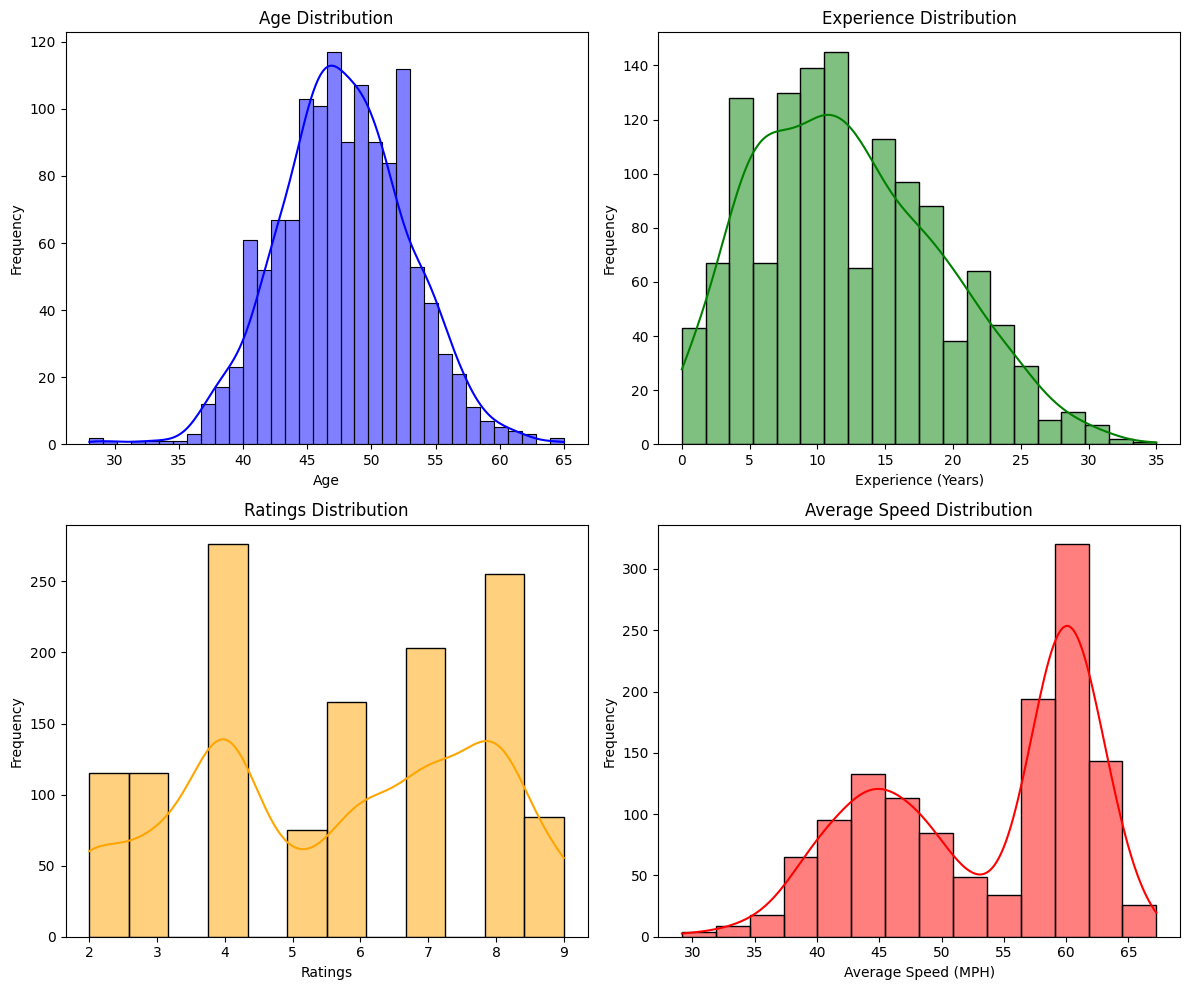

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram with KDE for age
sns.histplot(drivers_df['age'], kde=True, color='blue', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Histogram with KDE for experience
sns.histplot(drivers_df['experience'], kde=True, color='green', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('Experience Distribution')
axs[0, 1].set_xlabel('Experience (Years)')
axs[0, 1].set_ylabel('Frequency')

# Histogram with KDE for ratings
sns.histplot(drivers_df['ratings'], kde=True, color='orange', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Ratings Distribution')
axs[1, 0].set_xlabel('Ratings')
axs[1, 0].set_ylabel('Frequency')

# Histogram with KDE for average speed
sns.histplot(drivers_df['average_speed_mph'], kde=True, color='red', edgecolor='black', ax=axs[1, 1])
axs[1, 1].set_title('Average Speed Distribution')
axs[1, 1].set_xlabel('Average Speed (MPH)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

<details>
  <summary>Data Analysis and Recommendations</summary>
  
Analysis

1. **Age Distribution**:
   - The age distribution follows a fairly normal distribution, centered around ages 45 to 50, with a slight right skew. 
   - There are fewer data points at the extremes (below 35 and above 60).

2. **Experience Distribution**:
   - The experience distribution is skewed to the right, with most individuals having between 5 to 15 years of experience. 
   - The tail extends up to 35 years, but fewer data points exist in the higher range.

3. **Ratings Distribution**:
   - The ratings distribution is multimodal, with notable peaks around ratings of 4 and 8. 
   - There is variability across the ratings scale, and the distribution is not smooth, indicating distinct groups.

4. **Average Speed Distribution**:
   - The average speed distribution is skewed to the left, with most individuals having speeds around 50-60 MPH. 
   - There are fewer data points for average speeds above 65 MPH.

Recommendations

1. **Age Distribution**:
   - Age bins can be created (e.g., <40, 40-50, >50) for models that may benefit from this feature being treated in segments, especially when relationships with the target variable are nonlinear.

2. **Experience Distribution**:
   - Apply transformations (log or square root) to normalize the experience feature, as many machine learning models perform better with normally distributed features.

3. **Ratings Distribution**:
   - Consider using clustering techniques (K-means, hierarchical clustering) to identify distinct groups within the data.
   - Convert ratings into categorical variables, grouping them into high, medium, and low categories to simplify the feature for modeling.

4. **Average Speed Distribution**:
   - Use transformations to reduce the skewness in average speed, or alternatively, bin the feature into categories such as "low," "medium," and "high" for better interpretation in models.

</details>


<details>
  <summary>Data Preprocessing Steps for Driver table</summary>

1. **Handling Skewness**
   Both the `experience` and `speed` features show skewed distributions. For models sensitive to the normality of data (e.g., linear regression), applying transformations can help reduce skewness and improve model accuracy. Consider using one of the following transformations:

   - **Log Transformation**:
     - Suitable for positively skewed data.
     - Example: `np.log1p(x)` for log transformation.
   - **Square Root Transformation**:
     - Suitable for mild skewness.
     - Example: `np.sqrt(x)`.
   - **Box-Cox Transformation**:
     - More flexible as it adjusts skewness based on lambda parameter.
     - Example: `scipy.stats.boxcox(x)`.

2. **Outlier Detection**
   Particularly in the `experience` and `speed` features, identifying and treating outliers can prevent them from having an outsized influence on model performance. Common techniques for outlier detection:

   - **IQR Filtering**:
     - IQR (Interquartile Range) can help detect outliers.
     - Example: 
       ```python
       Q1 = data['experience'].quantile(0.25)
       Q3 = data['experience'].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       filtered_data = data[(data['experience'] >= lower_bound) & (data['experience'] <= upper_bound)]
       ```
   - **Z-score Threshold**:
     - Detects outliers based on how many standard deviations away from the mean a data point is.
     - Example:
       ```python
       from scipy import stats
       z_scores = np.abs(stats.zscore(data['speed']))
       filtered_data = data[(z_scores < 3)]
       ```

3. **Feature Scaling**
   It may be beneficial to scale all numerical features (e.g., `age`, `experience`, `speed`) using standardization or normalization. This ensures the features are on the same scale, which is especially useful for algorithms like SVM, KNN, and neural networks. Two common scaling techniques are:

   - **Standardization (Z-scores)**:
     - Subtract the mean and divide by the standard deviation.
     - Example: 
       ```python
       from sklearn.preprocessing import StandardScaler
       scaler = StandardScaler()
       scaled_data = scaler.fit_transform(data[['age', 'experience', 'speed']])
       ```
   - **Normalization (Min-Max Scaling)**:
     - Scale features between 0 and 1.
     - Example:
       ```python
       from sklearn.preprocessing import MinMaxScaler
       minmax_scaler = MinMaxScaler()
       normalized_data = minmax_scaler.fit_transform(data[['age', 'experience', 'speed']])
       ```

By applying these techniques, we can improve the robustness and performance of machine learning models built on this dataset.
</details>

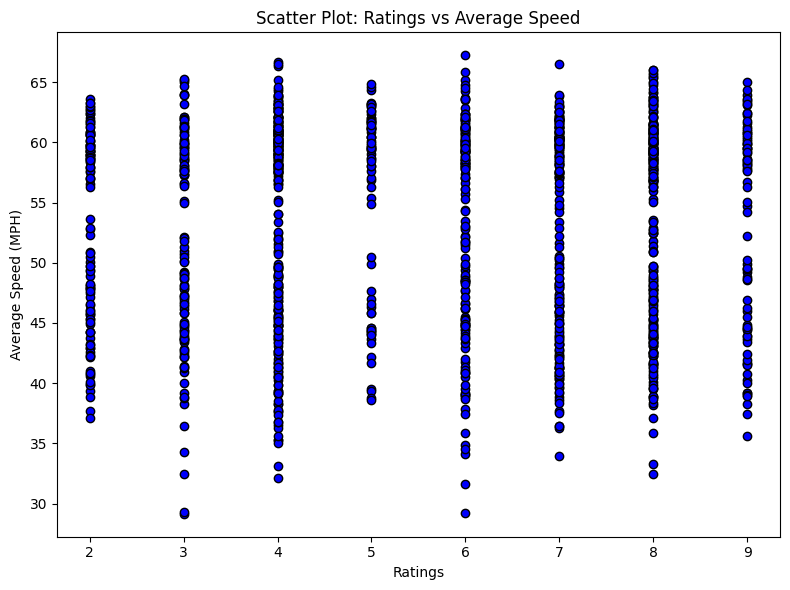

In [24]:

plt.figure(figsize=(8, 6))

# Scatter plot for Ratings vs Average Speed
plt.scatter(drivers_df['ratings'], drivers_df['average_speed_mph'], color='blue', edgecolor='black')

# Titles and labels
plt.title('Scatter Plot: Ratings vs Average Speed')
plt.xlabel('Ratings')
plt.ylabel('Average Speed (MPH)')

plt.tight_layout()
# Display the plot
plt.show()

<details>
    <summary>Graph analysis and recommendations</summary>

Analysis

1. **Scatter Plot: Ratings vs Average Speed**:
   - The scatter plot shows the relationship between ratings (x-axis) and average speed (y-axis).
   - The data points are relatively dispersed across the range of ratings, indicating that average speed varies widely for each rating.
   - There is no strong visible correlation between ratings and average speed; ratings range from 2 to 9, while average speeds range from 30 MPH to 65 MPH.
   - The spread of average speeds is consistent across most ratings, with notable clusters around speeds of 40-50 MPH and 55-65 MPH.

Recommendations

1. **Correlation Analysis**:
   - Perform a correlation analysis (such as Pearson or Spearman correlation) to confirm if there is any statistical relationship between ratings and average speed. This can help determine if these variables are related or independent.
   
2. **Grouping Ratings**:
   - Consider grouping ratings into broader categories (e.g., low, medium, high) to simplify analysis and better visualize trends or patterns in average speed behavior across rating ranges.

3. **Nonlinear Relationships**:
   - Explore nonlinear models or transformations to capture any potential non-linear relationships between ratings and average speed, which might not be visible in a simple scatter plot.

4. **Feature Engineering**:
   - Investigate interactions between ratings and other variables (like time of day or weather conditions) to see if the relationship between ratings and average speed changes under certain conditions.
   
5. **Clustering**:
   - The clusters of points around certain speed ranges (e.g., 40-50 MPH and 55-65 MPH) might indicate the presence of distinct groups in the data. Applying clustering algorithms could help segment the data for further insights.
</details>

<Figure size 800x600 with 0 Axes>

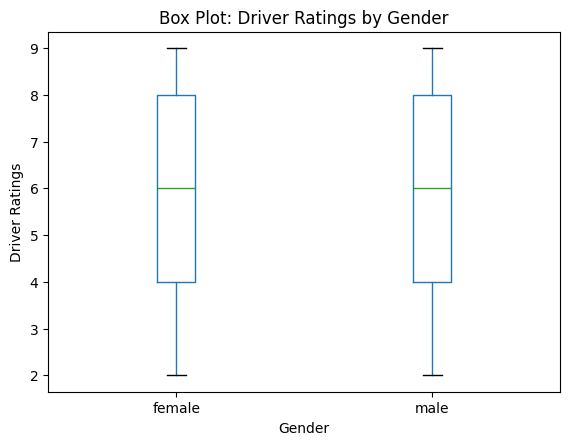

In [25]:
# Creating a box plot for Driver Ratings by Gender

plt.figure(figsize=(8, 6))

# Box plot for Driver Ratings by Gender
drivers_df.boxplot(column='ratings', by='gender', grid=False)

# Titles and labels
plt.title('Box Plot: Driver Ratings by Gender')
plt.suptitle('')  # Suppress the automatic title from pandas boxplot
plt.xlabel('Gender')
plt.ylabel('Driver Ratings')

# Display the plot
plt.show()


<details>
  <summary><b>Box Plot Analysis - Driver Ratings by Gender</b></summary>

Analysis

  1. **Box Plot: Driver Ratings by Gender**:
     - The box plot compares the distribution of driver ratings between female and male drivers.
     - The median rating for both genders appears to be around 6, with a very similar range of ratings.
     - Both male and female drivers have ratings spanning from around 2 to 9.
     - The interquartile range (IQR), which shows the middle 50% of the data, is very similar for both genders, indicating that there is little variation between the distribution of ratings by gender.

Recommendations

  1. **Statistical Test**:
     - Perform a statistical test (such as a t-test or Mann-Whitney U test) to check if there is a significant difference in the ratings between male and female drivers. This will help confirm if the small visible difference is statistically meaningful.

  2. **Feature Relevance**:
     - Since the difference between male and female driver ratings is minimal, gender may not be a significant factor in predicting driver ratings. Further analysis should explore whether gender adds value to a predictive model or if it can be safely excluded.

  3. **Exploration of Other Factors**:
     - Explore the interaction of gender with other factors (such as experience, average speed, or time of day) to understand if gender might influence ratings in combination with other variables.

  4. **Balanced Data**:
     - Ensure that the dataset has balanced representation of both genders to avoid any potential biases. If there's an imbalance, techniques like resampling or adjusting weights in the model might be necessary to mitigate bias in predictions.

  5. **Model Feature Engineering**:
     - If no significant difference is found, gender could potentially be excluded as a feature in the model to simplify the model and reduce complexity.

</details>


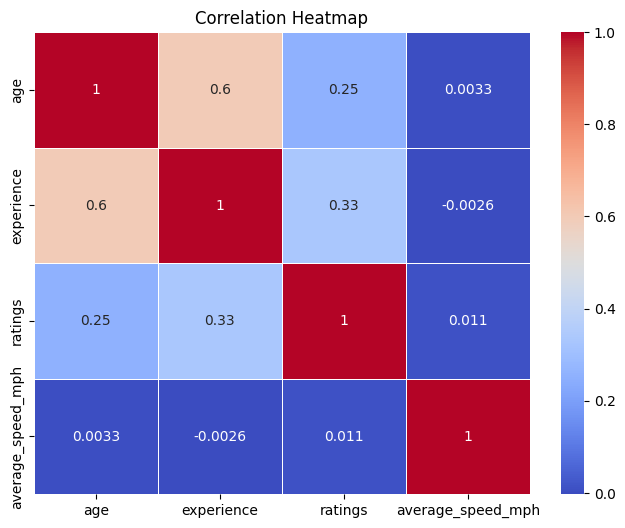

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical columns
numerical_columns = ['age', 'experience', 'ratings', 'average_speed_mph']

# Calculating the correlation matrix
correlation_matrix = drivers_df[numerical_columns].corr()

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()


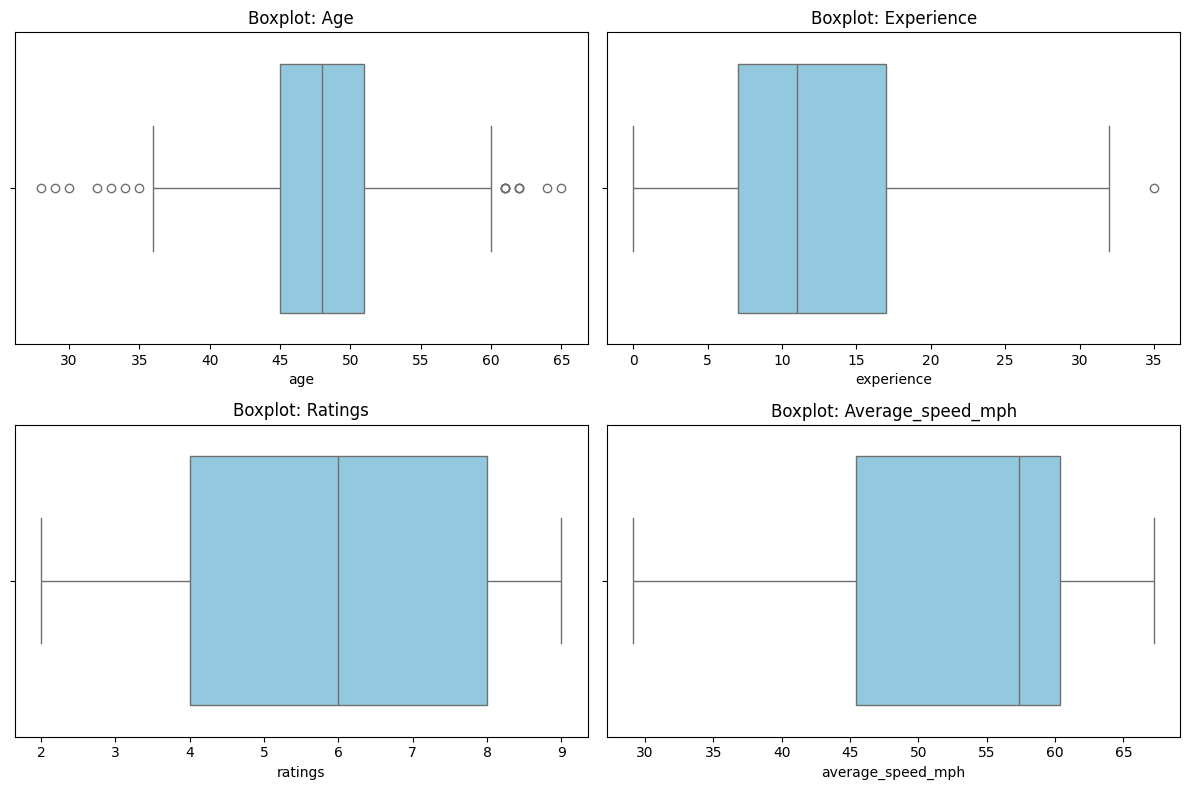

In [27]:
integer_columns = ['age', 'experience', 'ratings', 'average_speed_mph']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=drivers_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

<details>
  <summary><b>Box Plot Analysis for Age, Experience, Ratings, and Average Speed</b></summary>

Analysis

  1. **Boxplot: Age**:
     - The age distribution has a central range from approximately 43 to 52 years, with some outliers on both the lower and upper ends (below 35 and above 60).
     - The data is fairly symmetrically distributed around the median age, with a slightly wider spread on the lower end.

  2. **Boxplot: Experience**:
     - The experience distribution shows most values between 5 and 20 years, with a median around 12 years.
     - There are a few outliers beyond 30 years of experience, but the majority of data points fall within a relatively consistent range.

  3. **Boxplot: Ratings**:
     - The ratings distribution is more spread out, ranging from 2 to 9, with the middle 50% of data falling between ratings 4 and 8.
     - The data is symmetric, and there are no significant outliers, indicating a relatively consistent range of ratings.

  4. **Boxplot: Average Speed (mph)**:
     - The average speed distribution is right-skewed, with most values between 45 and 60 mph, and a median close to 55 mph.
     - There are no extreme outliers, and the data shows a relatively consistent spread between 30 and 65 mph.

Recommendations

  1. **Age**:
     - The few outliers in the age distribution could be investigated to understand if they represent a different segment of the population or need further analysis. These outliers can either be removed or handled with robust scaling techniques if necessary.

  2. **Experience**:
     - The outliers beyond 30 years of experience should be examined to determine if they are anomalies or key data points. If they don't add valuable insights, consider capping or treating them.
     - Applying a transformation (e.g., log) might help normalize the data for models sensitive to distribution skewness.

  3. **Ratings**:
     - Ratings data is well-distributed, with no major issues. Consider binning the ratings into categories (e.g., low, medium, high) to simplify the model and potentially improve interpretability.

  4. **Average Speed**:
     - No significant outliers are present, and the data is right-skewed. You could consider using a log transformation to reduce the skewness or create speed bins to capture various speed levels (e.g., slow, moderate, fast).
     - Investigate any potential interactions between average speed and other variables like experience or ratings to find meaningful insights.

  5. **General**:
     - For age, experience, and average speed, applying feature scaling or normalization would improve the performance of many machine learning models.
     - Investigate the relationships between these features to engineer interaction terms that could capture deeper patterns within the data.

</details>


In [28]:
import numpy as np
from scipy import stats

# Z-Score method to detect outliers
def z_score_outliers(column):
    z_scores = np.abs(stats.zscore(drivers_df[column]))
    outliers = drivers_df[z_scores > 3]
    return outliers

# IQR method to detect outliers
def iqr_outliers(column):
    Q1 = drivers_df[column].quantile(0.25)
    Q3 = drivers_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = drivers_df[(drivers_df[column] < lower_bound) | (drivers_df[column] > upper_bound)]
    return outliers

# Detecting outliers in 'age', 'experience', 'ratings', and 'average_speed_mph'
columns_to_check = ['age', 'experience', 'ratings', 'average_speed_mph']

outliers_z = {column: z_score_outliers(column) for column in columns_to_check}
outliers_iqr = {column: iqr_outliers(column) for column in columns_to_check}

# Displaying results
# pd.concat(outliers_z.values()).drop_duplicates())
pd.concat(outliers_iqr.values()).drop_duplicates()


,id,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,1253,25ef512e-5,Charles Hatfield,male,35,2,conservative,8,21302712,46.87,2024-09-19 00:00:00+00:00
2,24,2d328d4c-1,Bryan Serrano,male,61,19,conservative,7,12515055,45.94,2024-09-19 00:00:00+00:00
161,262,cb11b50a-a,Ryan Casey,male,61,7,proactive,3,25017099,58.69,2024-09-19 00:00:00+00:00
441,687,2a297a0f-0,Howard Brown,male,30,3,conservative,3,11942046,43.58,2024-09-19 00:00:00+00:00
458,611,ee7e0f6c-5,Timothy Nguyen,male,32,6,conservative,8,25155294,56.84,2024-09-19 00:00:00+00:00
468,543,e12a5c2a-a,Anthony Lee,male,61,21,conservative,9,25301979,48.54,2024-09-19 00:00:00+00:00
556,1086,08a48509-4,Steven Nguyen,male,29,5,proactive,7,24771733,62.12,2024-09-19 00:00:00+00:00
591,1122,da88f63f-0,Edward Parker,male,33,4,proactive,8,30101314,55.93,2024-09-19 00:00:00+00:00
640,1051,a6505944-d,Daniel Buchanan,male,62,20,proactive,9,84459899,60.77,2024-09-19 00:00:00+00:00
757,632,f791ca88-e,Jesse Humphrey,male,28,4,proactive,4,29401560,58.69,2024-09-19 00:00:00+00:00


In [29]:
drivers_df = drivers_df.drop(pd.concat(outliers_iqr.values()).drop_duplicates().index)

In [30]:
drivers_df

,id,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
1,486,7b6fcc3d-2,Luis Anderson,male,45,10,conservative,3,30203269,38.29,2024-09-19 00:00:00+00:00
3,636,6bcd67ef-8,Daniel Ward,male,50,14,conservative,8,25377824,32.43,2024-09-19 00:00:00+00:00
4,38,03a30b47-b,Alexander Malone,male,53,24,proactive,4,33201533,61.75,2024-09-19 00:00:00+00:00
5,672,25f1662d-f,Juan Rodriguez,male,46,12,conservative,8,19220150,48.85,2024-09-19 00:00:00+00:00
6,590,dfb33269-1,William Hoffman,male,52,28,conservative,7,20516509,37.67,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
1295,1264,e557d444-e,Anna Sanders,male,51,6,conservative,3,12090353,48.74,2024-09-19 00:00:00+00:00
1296,777,1fb7f030-8,James Wells,male,55,21,conservative,4,19424012,50.73,2024-09-19 00:00:00+00:00
1297,1241,50a9e569-f,Christopher Smith,male,42,11,conservative,4,19398597,47.45,2024-09-19 00:00:00+00:00
1298,1128,6531de3d-0,Eric Berry,male,53,27,proactive,4,28775810,59.37,2024-09-19 00:00:00+00:00


## Trucks Table

In [16]:
trucks_df

,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,event_time
0,1253,21302712,10,8610.619469,16,gas,2024-09-19 00:00:00+00:00
1,486,30203269,10,3000.000000,22,diesel,2024-09-19 00:00:00+00:00
2,24,12515055,5,3000.000000,20,diesel,2024-09-19 00:00:00+00:00
3,636,25377824,9,3000.000000,17,gas,2024-09-19 00:00:00+00:00
4,38,33201533,7,4000.000000,24,diesel,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...
1295,1264,12090353,10,15000.000000,20,diesel,2024-09-19 00:00:00+00:00
1296,777,19424012,11,6000.000000,17,gas,2024-09-19 00:00:00+00:00
1297,1241,19398597,5,15000.000000,20,gas,2024-09-19 00:00:00+00:00
1298,1128,28775810,14,10000.000000,17,gas,2024-09-19 00:00:00+00:00


In [17]:
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    1296 non-null   int64              
 1   truck_id              1296 non-null   int64              
 2   truck_age             1296 non-null   int64              
 3   load_capacity_pounds  1296 non-null   float64            
 4   mileage_mpg           1296 non-null   int64              
 5   fuel_type             1296 non-null   object             
 6   event_time            1296 non-null   datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), int64(4), object(1)
memory usage: 81.0+ KB


In [18]:
trucks_df.describe()

,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg
count,1296.000000,1.296000e+03,1296.000000,1296.000000,1296.000000
mean,651.527006,3.257100e+07,9.533179,8608.646072,20.786265
std,375.431992,2.197391e+07,2.009739,5464.320885,3.658153
min,1.000000,1.000839e+07,4.000000,3000.000000,11.000000
25%,327.750000,1.817244e+07,8.000000,4000.000000,18.000000
50%,652.500000,2.584212e+07,10.000000,6000.000000,21.000000
75%,976.250000,3.339243e+07,11.000000,15000.000000,24.000000
max,1300.000000,9.998167e+07,15.000000,20000.000000,29.000000


In [19]:
trucks_df['load_capacity_pounds'].fillna(trucks_df['load_capacity_pounds'].mean(), inplace=True)

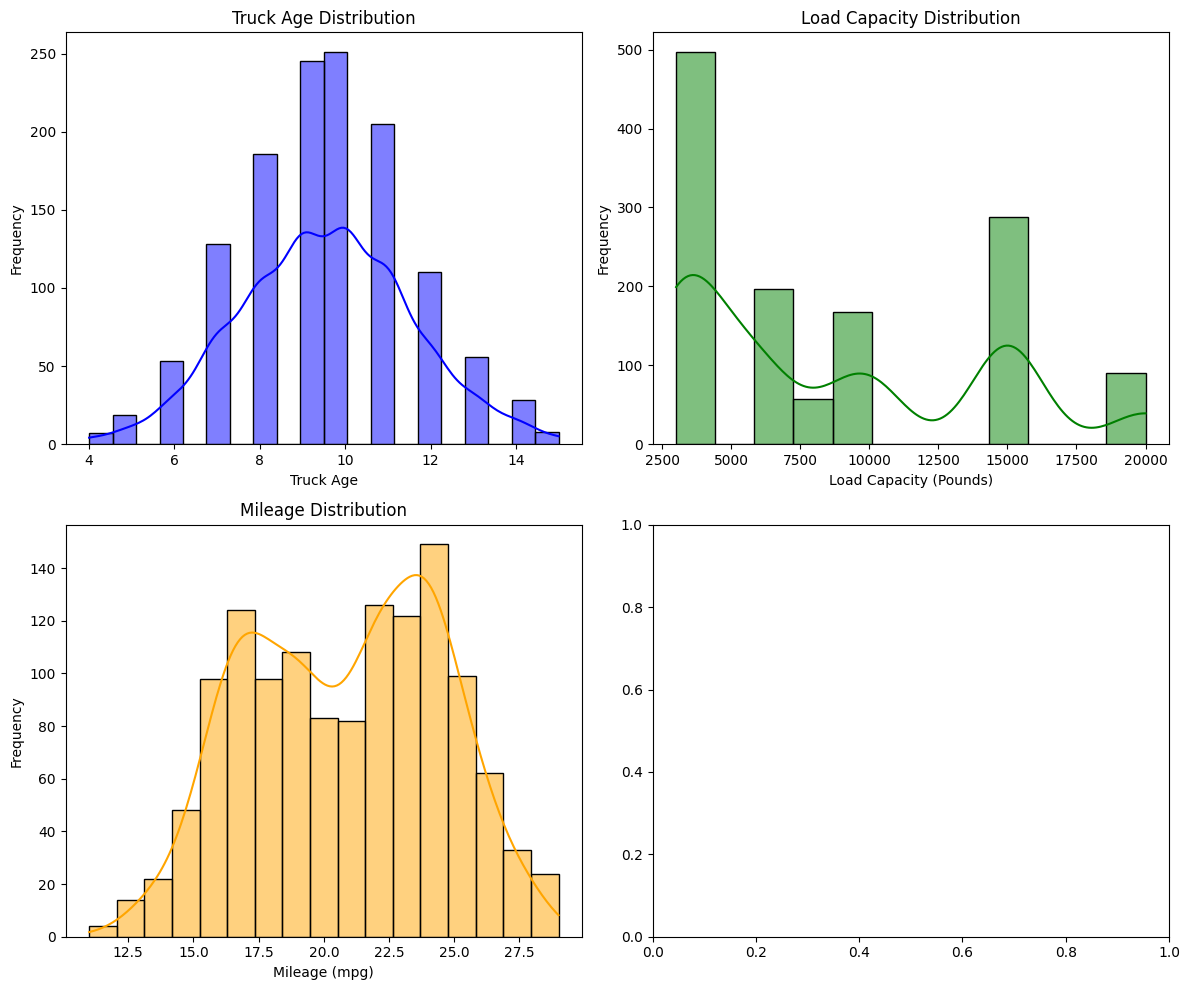

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for age
sns.histplot(trucks_df['truck_age'], kde=True, color='blue', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Truck Age Distribution')
axs[0, 0].set_xlabel('Truck Age')
axs[0, 0].set_ylabel('Frequency')

# Histogram for experience
sns.histplot(trucks_df['load_capacity_pounds'], kde=True, color='green', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('Load Capacity Distribution')
axs[0, 1].set_xlabel('Load Capacity (Pounds)')
axs[0, 1].set_ylabel('Frequency')

# Histogram for ratings
sns.histplot(trucks_df['mileage_mpg'], kde=True, color='orange', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Mileage Distribution')
axs[1, 0].set_xlabel('Mileage (mpg)')
axs[1, 0].set_ylabel('Frequency')

# Histogram for average speed
# axs[1, 1].hist(drivers_df['average_speed_mph'], bins=10, color='red', edgecolor='black')
# axs[1, 1].set_title('Average Speed Distribution')
# axs[1, 1].set_xlabel('Average Speed (MPH)')
# axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show histograms
plt.show()

<details>
  <summary><b>Truck Data Analysis and Recommendations</b></summary>

Analysis

  1. **Truck Age Distribution**:
     - The distribution of truck ages is relatively normal, centered around 9-10 years.
     - There are fewer trucks at both the lower and higher age extremes, with most trucks falling between 6 and 12 years old.
     - The slight skew towards younger trucks may indicate that fleets are more frequently updated in this range.

  2. **Load Capacity Distribution**:
     - The load capacity distribution is multimodal, with peaks at 5,000 pounds and around 15,000 pounds.
     - There are significant gaps in frequencies, especially between 7,500 and 10,000 pounds and 12,500 and 15,000 pounds.
     - This could indicate two distinct categories or classes of trucks based on load capacity.

  3. **Mileage Distribution**:
     - The mileage (mpg) distribution is bimodal, with peaks around 17.5 and 25 mpg.
     - There is a wide range of mileage, with most trucks falling between 15 and 25 mpg.
     - The gap between peaks suggests different efficiency levels for different types of trucks, possibly based on load capacity or truck age.

Recommendations

  1. **Truck Age**:
     - The truck age distribution is fairly normal, and no immediate transformation is necessary. However, it could be beneficial to create truck age bins (e.g., <6 years, 6-10 years, >10 years) to capture any potential nonlinear relationships with target variables.

  2. **Load Capacity**:
     - Given the multimodal distribution, clustering techniques could be applied to segment the trucks into categories based on load capacity. This would allow for a more structured analysis, especially when trying to identify patterns in relation to other features like mileage.
     - Alternatively, converting load capacity into categorical bins (e.g., low, medium, high capacity) could simplify the model.

  3. **Mileage**:
     - Since mileage has a bimodal distribution, it may be useful to create categorical bins or separate the data into distinct segments (low and high efficiency) based on the peaks.
     - Further analysis could be done to explore the relationship between mileage, truck age, and load capacity to determine the factors influencing truck efficiency.

  4. **General**:
     - Consider scaling or normalizing features like load capacity and mileage if models require normally distributed data.
     - Investigate potential interactions between truck age, load capacity, and mileage to create new features that could enhance the model's predictive capabilities.
     - Use feature engineering to capture nonlinear relationships by creating polynomial features or interaction terms based on the observed patterns in the distributions.

</details>


In [21]:
low_mileage_trucks = trucks_df[trucks_df['mileage_mpg'] < 15]


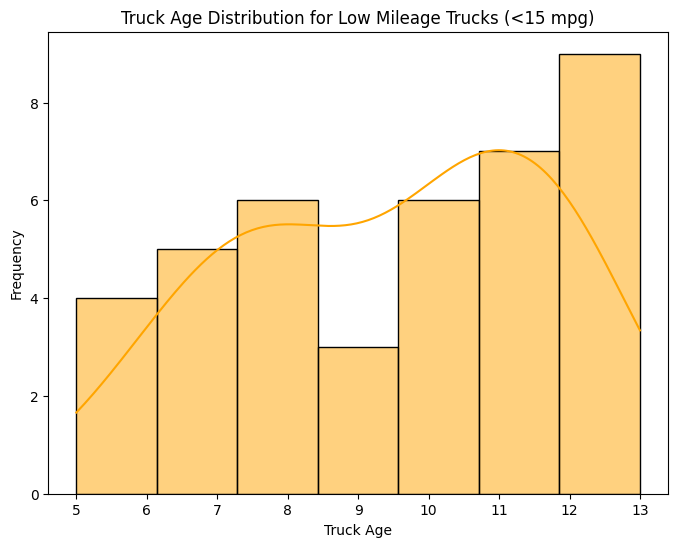

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(low_mileage_trucks['truck_age'], kde=True, color='orange', edgecolor='black')
plt.title('Truck Age Distribution for Low Mileage Trucks (<15 mpg)')
plt.xlabel('Truck Age')
plt.ylabel('Frequency')
plt.show()

<details>
  <summary><b>Truck Age Distribution for Low Mileage Trucks (<15 mpg) Analysis</b></summary>

Analysis

  1. **Truck Age Distribution for Low Mileage Trucks (<15 mpg)**:
     - The histogram shows the distribution of truck ages for trucks with less than 15 miles per gallon (mpg).
     - The distribution is not normal, with more trucks concentrated between 10 and 13 years of age, indicating older trucks are more likely to have low mileage efficiency.
     - There is a noticeable dip at age 9, suggesting fewer trucks with that age are in this low-efficiency category.
     - The trend rises from ages 5 to 13, peaking at age 12, indicating that trucks become less efficient as they age.

Recommendations

  1. **Maintenance and Replacement**:
     - Since older trucks, particularly those aged 10-13, are more likely to have low mileage, companies may want to consider replacing or upgrading trucks in this age group to improve fuel efficiency.

  2. **Feature Engineering**:
     - Truck age appears to be a key factor in predicting fuel efficiency, especially for low-mileage trucks. You could create interaction terms between truck age and mileage to improve model performance.

  3. **Preventative Measures**:
     - For trucks in the 9-12 year age range, maintenance efforts could be increased to prevent further drops in fuel efficiency as trucks approach their peak inefficiency age.

  4. **Modeling Impact**:
     - Age could be binned into categories for more granular analysis. For example, trucks aged 10-13 could be treated as a distinct group for low mileage predictions, while younger trucks (5-9 years) might have different efficiency patterns.

</details>


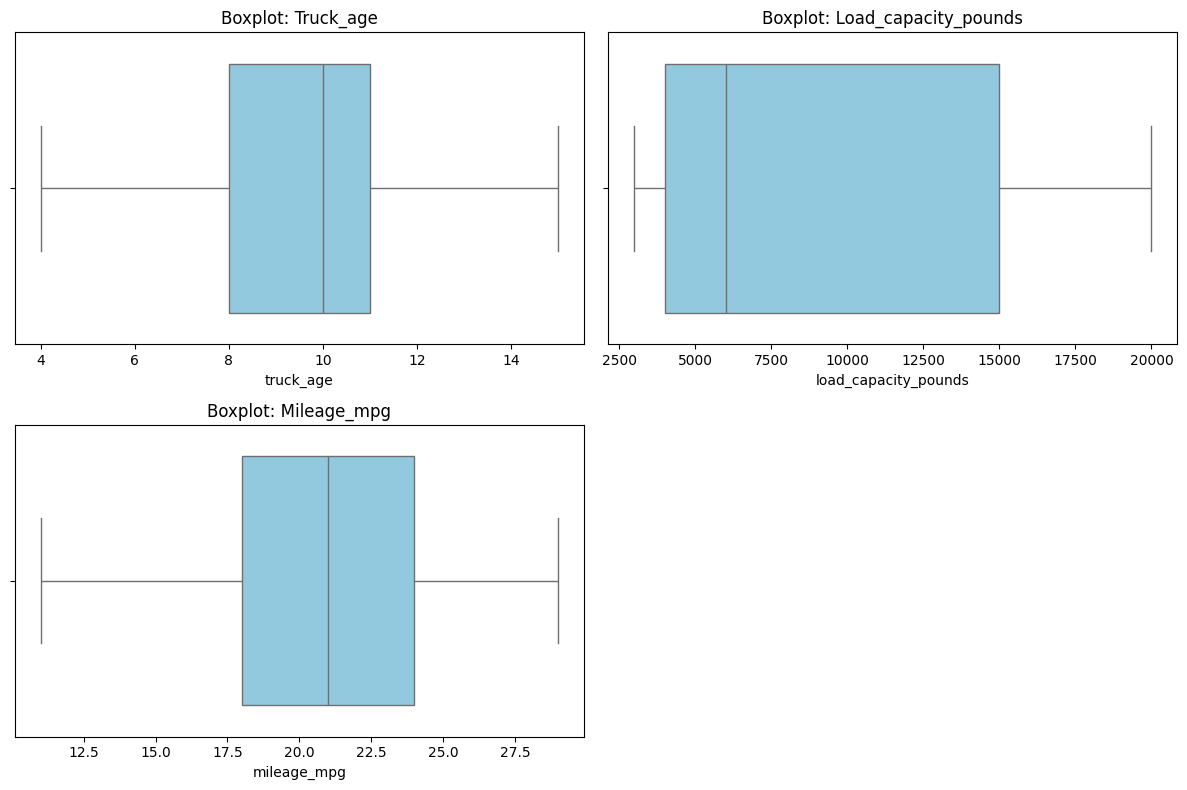

In [23]:
integer_columns = ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=trucks_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

<details>
  <summary><b>Box Plot Analysis for Truck Age, Load Capacity, and Mileage</b></summary>

Analysis

  1. **Boxplot: Truck Age**:
     - The truck age distribution shows that most trucks are between 7 and 12 years old, with a median age of approximately 9-10 years.
     - There is one outlier below 5 years, but the rest of the data points fall within a consistent range without significant outliers.

  2. **Boxplot: Load Capacity (Pounds)**:
     - The load capacity distribution spans from 2,500 to 20,000 pounds, with a median around 7,500 pounds.
     - There are no extreme outliers, and the distribution is relatively wide, indicating a diverse range of truck types or capacities.

  3. **Boxplot: Mileage (mpg)**:
     - The mileage distribution ranges from approximately 12.5 to 27.5 mpg, with a median value of about 20-22 mpg.
     - There are no significant outliers, and the data is evenly spread across the middle 50% of trucks, suggesting that mileage varies consistently.

Recommendations

  1. **Truck Age**:
     - The outlier for truck age could be further analyzed to determine if it represents an unusual case (e.g., a new truck in a predominantly older fleet) or an error.
     - Given that truck age is an important factor for various operational costs and maintenance schedules, it might be useful to bin this feature into categories (e.g., new, mid-aged, old) for more focused analysis.

  2. **Load Capacity**:
     - The wide range of load capacities suggests that there may be distinct categories of trucks (light-duty, medium-duty, heavy-duty). Consider segmenting trucks based on load capacity into these categories for deeper analysis.
     - Since load capacity might influence other features like mileage, consider exploring interactions between load capacity and other variables.

  3. **Mileage**:
     - The mileage feature appears well-distributed, but investigating whether mileage varies by truck age or load capacity could reveal further insights. This could help create new interaction terms for machine learning models.
     - Consider creating mileage bins (e.g., low, medium, high efficiency) to group trucks for performance comparison or fuel efficiency improvement strategies.

  4. **General**:
     - Feature scaling (standardization or normalization) may be beneficial if using machine learning models that are sensitive to the magnitude of features.
     - Investigate possible relationships or correlations between truck age, load capacity, and mileage to develop more accurate predictive models and identify areas for operational optimization.

</details>


In [24]:
import numpy as np
from scipy import stats

# Z-Score method to detect outliers
def z_score_outliers(column):
    z_scores = np.abs(stats.zscore(trucks_df[column]))
    outliers = trucks_df[z_scores > 3]
    return outliers

# IQR method to detect outliers
def iqr_outliers(column):
    Q1 = trucks_df[column].quantile(0.25)
    Q3 = trucks_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = trucks_df[(trucks_df[column] < lower_bound) | (trucks_df[column] > upper_bound)]
    return outliers

# Detecting outliers in 'age', 'experience', 'ratings', and 'average_speed_mph'
columns_to_check = ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

outliers_z = {column: z_score_outliers(column) for column in columns_to_check}
outliers_iqr = {column: iqr_outliers(column) for column in columns_to_check}

# Displaying results
# pd.concat(outliers_z.values()).drop_duplicates())
pd.concat(outliers_iqr.values()).drop_duplicates()


,id,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,event_time


In [25]:
trucks_df = trucks_df.drop(pd.concat(outliers_iqr.values()).drop_duplicates().index)

## Routes Table

In [41]:
routes_df

,id,route_id,origin_id,destination_id,distance,average_hours,event_time
0,522,R-a4b1265c,C-c7cacd1d,C-90e30162,873.53,17.47,2024-09-19 00:00:00+00:00
1,1253,R-46feb579,C-b25a09de,C-451776b7,2184.68,43.69,2024-09-19 00:00:00+00:00
2,486,R-13d078a8,C-c7cacd1d,C-d80a1e7d,470.26,9.41,2024-09-19 00:00:00+00:00
3,2138,R-7b677003,C-56b68559,C-2bd47dc5,910.01,18.20,2024-09-19 00:00:00+00:00
4,636,R-0149242c,C-c4565ee8,C-ef47bdcd,1162.96,23.26,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...
2347,2279,R-4a1409bd,C-e6dcda92,C-280b55fb,667.09,13.34,2024-09-19 00:00:00+00:00
2348,12,R-af4b19be,C-927ceb5e,C-84f378bb,433.01,8.66,2024-09-19 00:00:00+00:00
2349,565,R-120a90f5,C-ef47bdcd,C-34ae77b0,8236.81,164.74,2024-09-19 00:00:00+00:00
2350,1264,R-18468971,C-b25a09de,C-ff8c0c3c,833.74,16.67,2024-09-19 00:00:00+00:00


In [42]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              2352 non-null   int64              
 1   route_id        2352 non-null   object             
 2   origin_id       2352 non-null   object             
 3   destination_id  2352 non-null   object             
 4   distance        2352 non-null   float64            
 5   average_hours   2352 non-null   float64            
 6   event_time      2352 non-null   datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(2), int64(1), object(3)
memory usage: 128.8+ KB


In [43]:
routes_df.describe()

,id,distance,average_hours
count,2352.000000,2352.000000,2352.000000
mean,1176.500000,2376.825230,47.536556
std,679.108239,2696.904248,53.938045
min,1.000000,3.900000,0.080000
25%,588.750000,557.365000,11.147500
50%,1176.500000,1104.825000,22.100000
75%,1764.250000,2516.407500,50.327500
max,2352.000000,10055.010000,201.100000


Text(0, 0.5, 'Frequency')

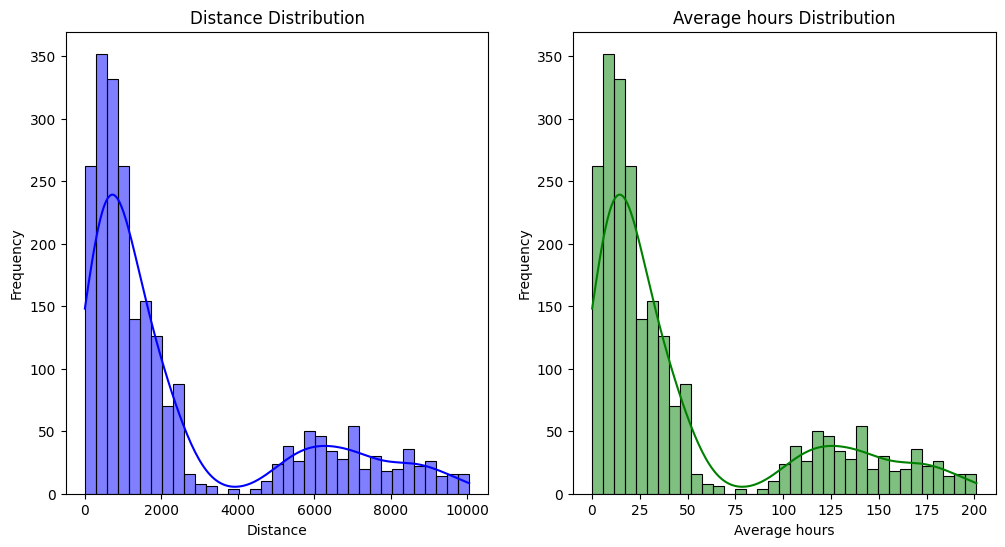

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(routes_df['distance'], kde=True, color='blue', edgecolor='black', ax=axs[0])
axs[0].set_title('Distance Distribution')
axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Frequency')

# Histogram for experience
sns.histplot(routes_df['average_hours'], kde=True, color='green', edgecolor='black', ax=axs[1])
axs[1].set_title('Average hours Distribution')
axs[1].set_xlabel('Average hours')
axs[1].set_ylabel('Frequency')

<details>
  <summary><b>Distance and Average Hours Distribution Analysis</b></summary>

Analysis

  1. **Distance Distribution**:
     - The distance distribution is highly skewed to the right, with most distances falling between 0 and 2000 units. 
     - There is a noticeable drop-off after 2000 units, with a small secondary peak around 5000-7000 units, suggesting that there are occasional longer trips.
     - The long tail in the distribution indicates a few very long distances that occur less frequently.

  2. **Average Hours Distribution**:
     - Similar to the distance distribution, the average hours distribution is also right-skewed, with most values clustered between 0 and 50 hours.
     - There is a sharp decline after 50 hours, but some smaller peaks are visible beyond 100 hours, suggesting that a subset of instances requires significantly longer time periods.
     - This tail may represent exceptional cases or outliers where trucks are used for extended periods.

Recommendations

  1. **Distance**:
     - Consider applying a log transformation to reduce the skewness of the distance feature, especially if you're using a model that assumes normally distributed data.
     - Explore creating distance bins (e.g., short, medium, long trips) to help simplify the analysis and capture different types of driving patterns.
     - Investigate the secondary peak in the distance distribution (around 5000-7000 units) to understand if these longer trips have distinct characteristics or operational requirements.

  2. **Average Hours**:
     - Apply a similar log transformation to the average hours feature to reduce its skewness, which could improve model performance.
     - Examine the cases where the average hours exceed 100, as these may represent rare or exceptional cases that could either be outliers or significant data points for specific use cases.
     - Consider using clustering techniques to group instances with high average hours and investigate if there are any operational differences between shorter and longer-duration cases.

  3. **General**:
     - Both features show long tails and are skewed, so transforming or binning the data would likely help with model stability.
     - Perform a correlation analysis between distance and average hours to see if the two features are related, which might influence how they are treated in modeling.
     - Use feature scaling (normalization or standardization) to bring these variables to a similar scale, especially for models sensitive to feature magnitudes (e.g., linear regression, neural networks).

</details>


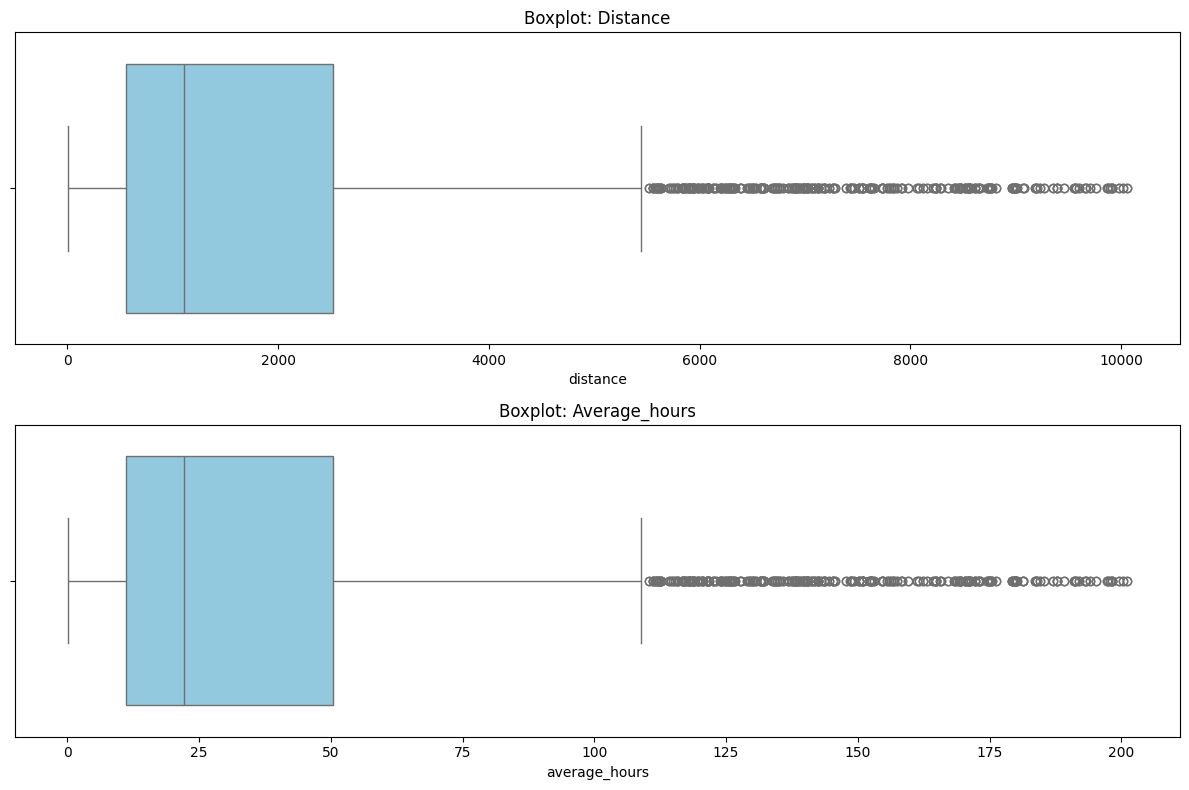

In [45]:
integer_columns = ['distance', 'average_hours']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x=routes_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

<details>
  <summary><b>Box Plot Analysis for Distance and Average Hours</b></summary>

Analysis

  1. **Boxplot: Distance**:
     - The distance data shows a significant spread, with most values concentrated below 3000 units.
     - There is a large number of outliers extending beyond 6000 units, with some reaching close to 10,000 units.
     - The interquartile range (IQR) is between 0 and approximately 3000 units, indicating that most trips are shorter, but there are occasional longer trips.

  2. **Boxplot: Average Hours**:
     - The distribution of average hours also shows a wide range, with most values falling below 75 hours.
     - There are a significant number of outliers above 100 hours, with some exceeding 150 and reaching close to 200 hours.
     - The middle 50% of the data falls between 0 and 50 hours, with a median close to 25 hours.

Recommendations

  1. **Distance**:
     - Given the large number of outliers, consider applying a log transformation to reduce the skewness and make the distribution more normal for modeling purposes.
     - Alternatively, consider capping the outliers or using robust scaling techniques to prevent the extreme values from overly influencing the model.
     - Investigate the outliers (trips over 6000 units) to determine if they represent legitimate long-distance trips or potential data anomalies.

  2. **Average Hours**:
     - Similar to the distance feature, apply a log transformation to reduce the effect of outliers or use capping techniques to handle values above 100 hours.
     - Investigate the outliers above 100 hours to determine if these represent valid data points or if they indicate operational inefficiencies that need to be addressed.
     - Consider segmenting the average hours feature into bins (e.g., short, medium, long) to capture distinct types of trip durations and simplify the analysis.

  3. **General**:
     - Both features show substantial outliers, which could affect model performance. Proper handling of these outliers is crucial for creating robust and accurate models.
     - Feature scaling (standardization or normalization) may improve model stability, especially for distance and average hours when used in machine learning algorithms.

</details>


In [46]:
import numpy as np
from scipy import stats

# Z-Score method to detect outliers
def z_score_outliers(column):
    z_scores = np.abs(stats.zscore(routes_df[column]))
    outliers = routes_df[z_scores > 3]
    return outliers

# IQR method to detect outliers
def iqr_outliers(column):
    Q1 = routes_df[column].quantile(0.25)
    Q3 = routes_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = routes_df[(routes_df[column] < lower_bound) | (routes_df[column] > upper_bound)]
    return outliers

# Detecting outliers in 'age', 'experience', 'ratings', and 'average_speed_mph'
columns_to_check = ['distance', 'average_hours']

outliers_z = {column: z_score_outliers(column) for column in columns_to_check}
outliers_iqr = {column: iqr_outliers(column) for column in columns_to_check}

# Displaying results
# pd.concat(outliers_z.values()).drop_duplicates())
pd.concat(outliers_iqr.values()).drop_duplicates()


,id,route_id,origin_id,destination_id,distance,average_hours,event_time
9,1932,R-c9fb1296,C-d3bb431c,C-ef47bdcd,5907.05,118.14,2024-09-19 00:00:00+00:00
17,180,R-df1eda7f,C-4fe0fa24,C-2aaf0e1a,5723.07,114.46,2024-09-19 00:00:00+00:00
21,1752,R-8060c00e,C-2aaf0e1a,C-f5ed4c15,6837.65,136.75,2024-09-19 00:00:00+00:00
28,2110,R-3b9a94d5,C-2e349ccd,C-841ebdcb,8514.95,170.30,2024-09-19 00:00:00+00:00
29,757,R-9db6873e,C-ff8c0c3c,C-34ae77b0,8772.46,175.45,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...
2327,1016,R-bd8da55c,C-f8f01604,C-731988ba,5787.47,115.75,2024-09-19 00:00:00+00:00
2341,1606,R-4afb528e,C-fc66f0ab,C-f8f01604,6198.75,123.98,2024-09-19 00:00:00+00:00
2345,1704,R-0685acb5,C-5d86b887,C-f5ed4c15,6925.40,138.51,2024-09-19 00:00:00+00:00
2349,565,R-120a90f5,C-ef47bdcd,C-34ae77b0,8236.81,164.74,2024-09-19 00:00:00+00:00


In [47]:
routes_df = routes_df.drop(pd.concat(outliers_iqr.values()).drop_duplicates().index)

## Traffic table

In [5]:
traffic_df

,id,route_id,date,hour,no_of_vehicles,accident,event_time
0,1926759,R-63cfd788,2019-01-04 00:00:00+00:00,500,600.0,0,2024-09-19 00:00:00+00:00
1,2394217,R-a931dc38,2019-01-23 00:00:00+00:00,1500,2626.0,0,2024-09-19 00:00:00+00:00
2,2223251,R-58a47a19,2019-01-30 00:00:00+00:00,100,775.0,0,2024-09-19 00:00:00+00:00
3,751562,R-98b76ad5,2019-02-05 00:00:00+00:00,100,523.0,0,2024-09-19 00:00:00+00:00
4,1383318,R-6a0e52cf,2019-01-01 00:00:00+00:00,500,618.0,0,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...
2597908,1685008,R-37fc1cb6,2019-01-05 00:00:00+00:00,600,598.0,0,2024-09-19 00:00:00+00:00
2597909,1997773,R-af25bffd,2019-01-19 00:00:00+00:00,300,1041.0,1,2024-09-19 00:00:00+00:00
2597910,379138,R-ca9014a2,2019-01-20 00:00:00+00:00,900,2341.0,0,2024-09-19 00:00:00+00:00
2597911,453341,R-d5b79907,2019-01-30 00:00:00+00:00,400,580.0,0,2024-09-19 00:00:00+00:00


In [6]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 7 columns):
 #   Column          Dtype              
---  ------          -----              
 0   id              int64              
 1   route_id        object             
 2   date            datetime64[us, UTC]
 3   hour            int64              
 4   no_of_vehicles  float64            
 5   accident        int64              
 6   event_time      datetime64[us, UTC]
dtypes: datetime64[us, UTC](2), float64(1), int64(3), object(1)
memory usage: 138.7+ MB


In [7]:
traffic_df.isna().sum()

id                   0
route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
event_time           0
dtype: int64

In [8]:
traffic_df['no_of_vehicles'].fillna(traffic_df['no_of_vehicles'].mean(), inplace = True)

In [9]:
traffic_df.describe()

,id,hour,no_of_vehicles,accident
count,2.597913e+06,2.597913e+06,2.597913e+06,2.597913e+06
mean,1.298957e+06,1.150021e+03,1.566776e+03,5.320848e-02
std,7.499530e+05,6.922211e+02,8.957438e+02,2.244490e-01
min,1.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.494790e+05,6.000000e+02,6.070000e+02,0.000000e+00
50%,1.298957e+06,1.200000e+03,1.968000e+03,0.000000e+00
75%,1.948435e+06,1.800000e+03,2.326000e+03,0.000000e+00
max,2.597913e+06,2.300000e+03,3.636000e+03,1.000000e+00


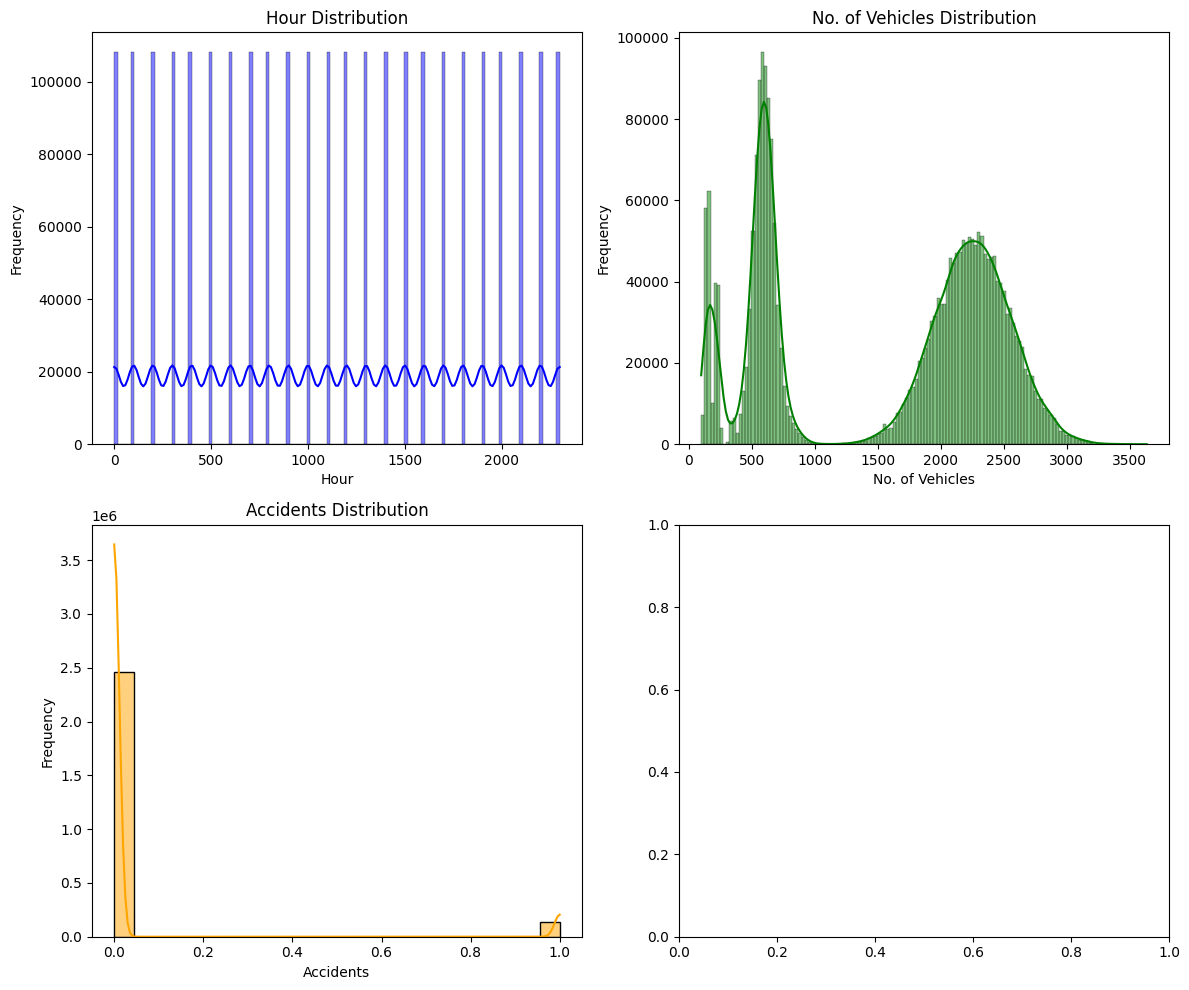

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for age
sns.histplot(traffic_df['hour'], kde=True, color='blue', edgecolor='black', ax=axs[0, 0])
axs[0, 0].set_title('Hour Distribution')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Frequency')

# Histogram for experience
sns.histplot(traffic_df['no_of_vehicles'], kde=True, color='green', edgecolor='black', ax=axs[0, 1])
axs[0, 1].set_title('No. of Vehicles Distribution')
axs[0, 1].set_xlabel('No. of Vehicles')
axs[0, 1].set_ylabel('Frequency')

# Histogram for ratings
sns.histplot(traffic_df['accident'], kde=True, color='orange', edgecolor='black', ax=axs[1, 0])
axs[1, 0].set_title('Accidents Distribution')
axs[1, 0].set_xlabel('Accidents')
axs[1, 0].set_ylabel('Frequency')

# Histogram for average speed
# axs[1, 1].hist(drivers_df['average_speed_mph'], bins=10, color='red', edgecolor='black')
# axs[1, 1].set_title('Average Speed Distribution')
# axs[1, 1].set_xlabel('Average Speed (MPH)')
# axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show histograms
plt.show()

<details>
  <summary><b>Distribution Analysis for Hour, Number of Vehicles, and Accidents</b></summary>

Analysis

  1. **Hour Distribution**:
     - The hour distribution shows a repeating pattern with consistent peaks at regular intervals, likely corresponding to hourly time slots.
     - The frequency is relatively consistent, with slight oscillations in the middle of the distribution, indicating periodic fluctuations but generally steady data points across all hours.

  2. **Number of Vehicles Distribution**:
     - The distribution of the number of vehicles is bimodal, with two distinct peaks.
     - The first peak occurs around 200-1000 vehicles, and the second, larger peak, is concentrated between 2000 and 3000 vehicles.
     - This suggests that vehicle counts can vary significantly, with both low and high traffic patterns being common in the dataset.

  3. **Accidents Distribution**:
     - The accidents distribution is highly skewed towards 0, with the vast majority of data points indicating no accidents.
     - There are very few cases where accidents occur, and when they do, the frequency is low, indicating accidents are rare events in the dataset.

Recommendations

  1. **Hour**:
     - Given the uniformity in hour distribution, no immediate transformation or modifications are necessary.
     - However, it may be helpful to further break down the data into specific time intervals (e.g., morning, afternoon, evening) to capture more granular patterns.

  2. **Number of Vehicles**:
     - The bimodal distribution suggests that there may be different types of traffic patterns (e.g., high-traffic periods and low-traffic periods). Consider segmenting the data into categories based on vehicle counts (e.g., low, medium, high) to simplify analysis.
     - Investigate whether external factors such as time of day, weather, or road conditions influence these traffic patterns, as this might provide additional insights.

  3. **Accidents**:
     - Since the accident data is highly skewed towards 0, you may want to treat this as a rare event classification problem.
     - Oversampling techniques like SMOTE or undersampling of non-accident cases could be used to balance the dataset if you are modeling accidents.
     - Alternatively, consider binning the accident variable into binary categories (accident or no accident) to simplify the modeling process.

  4. **General**:
     - Feature engineering could include creating interaction terms between the number of vehicles and hour to capture potential relationships between traffic flow and time of day.
     - Consider transforming or normalizing the skewed distributions (e.g., accidents) for machine learning models that assume normality.
     - Use clustering or segmentation techniques to explore distinct patterns in traffic behavior, especially for the bimodal vehicle distribution.

</details>


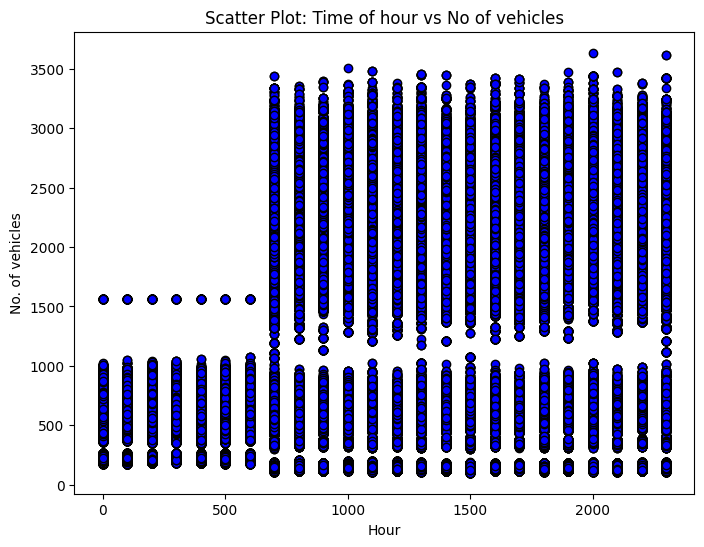

In [11]:
plt.figure(figsize=(8, 6))

plt.scatter(traffic_df['hour'], traffic_df['no_of_vehicles'], color='blue', edgecolor='black')

# Titles and labels
plt.title('Scatter Plot: Time of hour vs No of vehicles')
plt.xlabel('Hour')
plt.ylabel('No. of vehicles')

# Display the plot
plt.show()

<details>
  <summary><b>Scatter Plot Analysis for Time of Hour vs Number of Vehicles</b></summary>

Analysis

  1. **Scatter Plot: Time of Hour vs Number of Vehicles**:
     - The scatter plot shows the relationship between the time of the hour (x-axis) and the number of vehicles (y-axis).
     - There is a noticeable pattern where the number of vehicles tends to remain within the 1000-3500 range for certain intervals of time, while other time intervals show a lower range of around 0-1500 vehicles.
     - The data points are densely packed in horizontal strips, suggesting that specific hours or intervals consistently see similar vehicle counts.
     - There are a few higher outliers where vehicle counts exceed 3500.

Recommendations

  1. **Time-Based Analysis**:
     - Consider dividing the time into segments (e.g., peak and non-peak hours) to better understand traffic flow patterns.
     - The pattern of concentrated vehicle counts at specific times suggests traffic peaks, which could be explored further for congestion management or resource allocation.

  2. **Outlier Handling**:
     - Investigate the higher outliers where the number of vehicles exceeds 3500 to ensure they are valid data points and not errors or anomalies.
     - Depending on the goal, you may want to either cap the number of vehicles for modeling purposes or retain them if they represent significant traffic events.

  3. **Clustering**:
     - The vertical strips of data points indicate consistent patterns in vehicle numbers at specific times. Clustering techniques (such as K-means) could help segment the hours into groups with similar traffic patterns for more granular analysis.

  4. **Feature Engineering**:
     - Create additional time-based features (e.g., time of day, day of the week, holiday) to capture the impact of external factors on vehicle numbers and improve model predictions.
     - Investigate relationships between the number of vehicles and other variables (such as weather, road conditions, or day of the week) to enhance the predictive power of your model.

  5. **Normalization**:
     - Consider normalizing or scaling the number of vehicles feature if it's being used in a machine learning model, especially since there are significant variations in vehicle counts across different hours.

</details>


In [12]:
def categorize_time_of_day(hour):
    time_periods = {
        (300, 600): 'Early Morning',
        (600, 900): 'Morning',
        (900, 1200): 'Late Morning',
        (1200, 1500): 'Afternoon',
        (1500, 1800): 'Late Afternoon',
        (1800, 2100): 'Evening',
        (2100, 2400): 'Night',
        (0, 300): 'Late Night'
    }
    
    for (start, end), period in time_periods.items():
        if start <= hour < end:
            return period
    return 'Invalid Hour'

# Apply the function to categorize the 'hour' column
traffic_df['time_period'] = traffic_df['hour'].apply(categorize_time_of_day)

In [13]:
traffic_df

,id,route_id,date,hour,no_of_vehicles,accident,event_time,time_period
0,1926759,R-63cfd788,2019-01-04 00:00:00+00:00,500,600.0,0,2024-09-19 00:00:00+00:00,Early Morning
1,2394217,R-a931dc38,2019-01-23 00:00:00+00:00,1500,2626.0,0,2024-09-19 00:00:00+00:00,Late Afternoon
2,2223251,R-58a47a19,2019-01-30 00:00:00+00:00,100,775.0,0,2024-09-19 00:00:00+00:00,Late Night
3,751562,R-98b76ad5,2019-02-05 00:00:00+00:00,100,523.0,0,2024-09-19 00:00:00+00:00,Late Night
4,1383318,R-6a0e52cf,2019-01-01 00:00:00+00:00,500,618.0,0,2024-09-19 00:00:00+00:00,Early Morning
...,...,...,...,...,...,...,...,...
2597908,1685008,R-37fc1cb6,2019-01-05 00:00:00+00:00,600,598.0,0,2024-09-19 00:00:00+00:00,Morning
2597909,1997773,R-af25bffd,2019-01-19 00:00:00+00:00,300,1041.0,1,2024-09-19 00:00:00+00:00,Early Morning
2597910,379138,R-ca9014a2,2019-01-20 00:00:00+00:00,900,2341.0,0,2024-09-19 00:00:00+00:00,Late Morning
2597911,453341,R-d5b79907,2019-01-30 00:00:00+00:00,400,580.0,0,2024-09-19 00:00:00+00:00,Early Morning


2024-09-26 23:51:56,032 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-26 23:51:58,256 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


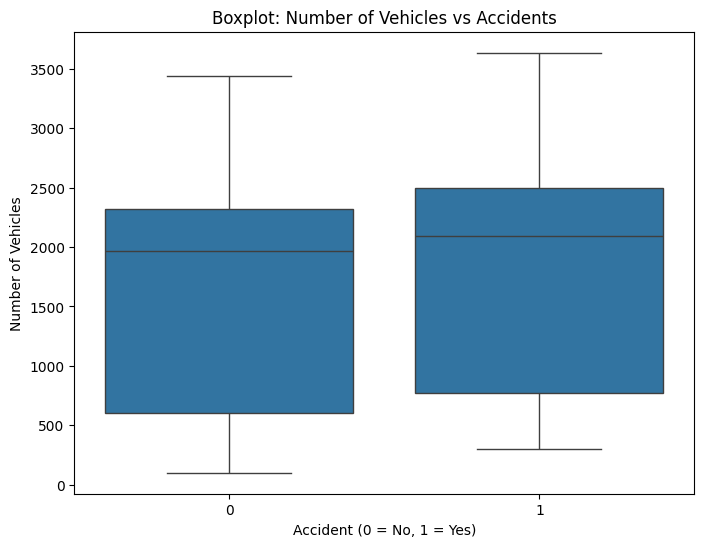

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='accident', y='no_of_vehicles', data=traffic_df)

# Add titles and labels
plt.title('Boxplot: Number of Vehicles vs Accidents')
plt.xlabel('Accident (0 = No, 1 = Yes)')
plt.ylabel('Number of Vehicles')

# Show the plot
plt.show()

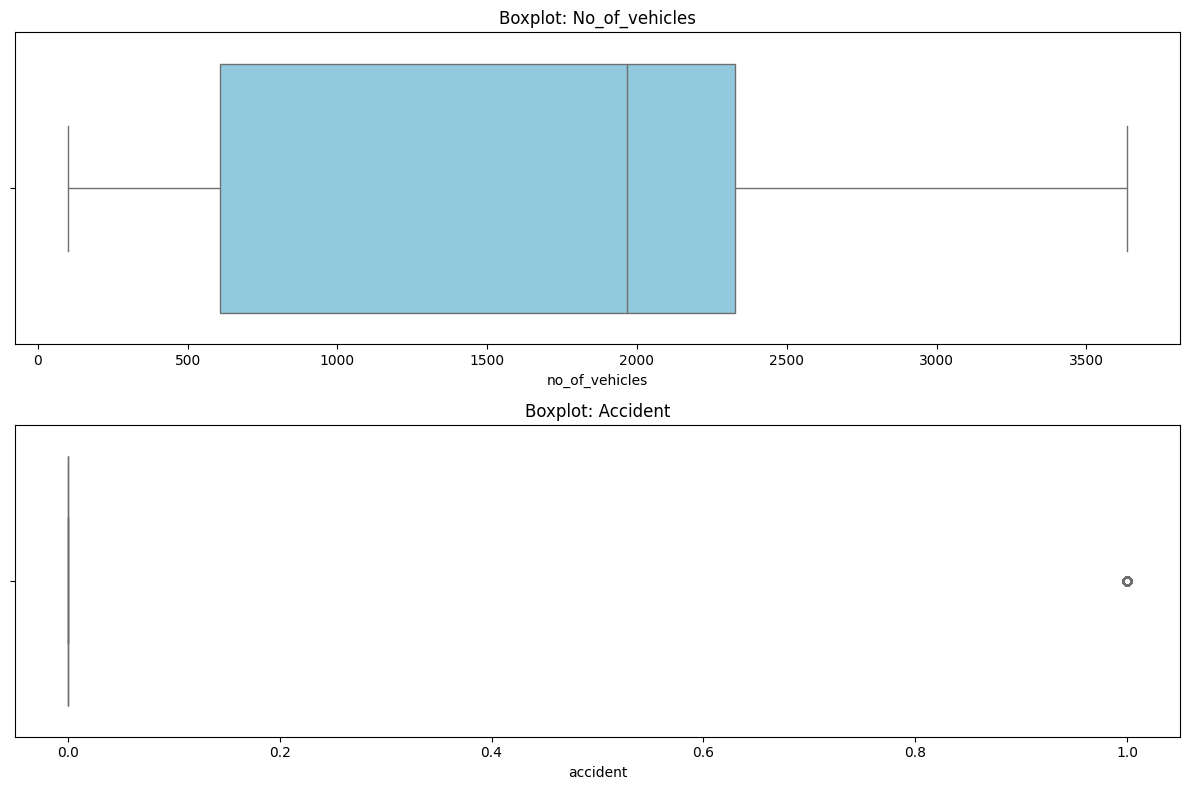

In [15]:
integer_columns = ['no_of_vehicles', 'accident']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x=traffic_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

## Truck schedule table

In [59]:
truck_schedule_df

,id,truck_id,route_id,departure_date,estimated_arrival,delay,event_time
0,8256,25645401,R-8adb758d,2019-02-09 07:00:00+00:00,2019-02-09 15:31:12+00:00,0,2024-09-19 00:00:00+00:00
1,9236,27121057,R-9e7ea58a,2019-02-12 07:00:00+00:00,2019-02-13 03:58:48+00:00,1,2024-09-19 00:00:00+00:00
2,1932,10966168,R-b2e25936,2019-01-10 07:00:00+00:00,2019-01-11 03:07:48+00:00,1,2024-09-19 00:00:00+00:00
3,10256,11835599,R-8e99ef5f,2019-01-31 07:00:00+00:00,2019-02-01 16:31:48+00:00,1,2024-09-19 00:00:00+00:00
4,5242,29121693,R-5efde222,2019-01-25 07:00:00+00:00,2019-01-25 12:01:48+00:00,0,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...
12303,10925,63052683,R-86dd80fc,2019-01-09 07:00:00+00:00,2019-01-11 08:04:48+00:00,1,2024-09-19 00:00:00+00:00
12304,2971,18678032,R-52653b9a,2019-01-13 07:00:00+00:00,2019-01-13 14:00:36+00:00,1,2024-09-19 00:00:00+00:00
12305,9841,28817628,R-9b98b32f,2019-01-16 07:00:00+00:00,2019-01-17 16:22:12+00:00,1,2024-09-19 00:00:00+00:00
12306,7157,11759429,R-0bac03b2,2019-02-03 07:00:00+00:00,2019-02-03 20:16:48+00:00,0,2024-09-19 00:00:00+00:00


In [60]:
truck_schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12308 entries, 0 to 12307
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 12308 non-null  int64              
 1   truck_id           12308 non-null  int64              
 2   route_id           12308 non-null  object             
 3   departure_date     12308 non-null  datetime64[us, UTC]
 4   estimated_arrival  12308 non-null  datetime64[us, UTC]
 5   delay              12308 non-null  int64              
 6   event_time         12308 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](3), int64(3), object(1)
memory usage: 673.2+ KB


In [61]:
truck_schedule_df.describe()

,id,truck_id,delay
count,12308.000000,1.230800e+04,12308.000000
mean,6154.500000,3.291135e+07,0.348879
std,3553.157891,2.221287e+07,0.476635
min,1.000000,1.000839e+07,0.000000
25%,3077.750000,1.844361e+07,0.000000
50%,6154.500000,2.611401e+07,0.000000
75%,9231.250000,3.325027e+07,1.000000
max,12308.000000,9.998167e+07,1.000000


## Routes Weather Table

In [62]:
routes_weather_df

,id,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
0,283767,R-fd69a297,2019-02-07 12:00:00+00:00,93,4,Sunny,0.0,17,6,1009,0,0,0,0,2024-09-19 00:00:00+00:00
1,130890,R-9bcf28e8,2019-01-16 06:00:00+00:00,86,5,Sunny,0.0,49,6,1014,0,0,0,0,2024-09-19 00:00:00+00:00
2,174710,R-483bf9db,2019-02-10 00:00:00+00:00,70,4,Sunny,0.0,45,6,1018,0,0,0,0,2024-09-19 00:00:00+00:00
3,106499,R-082bc641,2019-01-15 00:00:00+00:00,79,11,Sunny,0.0,49,6,1010,0,0,0,0,2024-09-19 00:00:00+00:00
4,94800,R-a3dada1d,2019-02-04 00:00:00+00:00,68,7,Moderate or heavy rain shower,0.1,93,5,1011,0,0,0,0,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,93972,R-6c4df280,2019-01-30 06:00:00+00:00,52,16,Light rain shower,0.0,81,6,998,0,0,0,0,2024-09-19 00:00:00+00:00
425708,78783,R-143555e9,2019-02-03 06:00:00+00:00,79,10,Sunny,0.0,9,6,1014,0,0,0,0,2024-09-19 00:00:00+00:00
425709,189782,R-e7c26c48,2019-01-24 00:00:00+00:00,63,11,Moderate or heavy rain shower,0.1,93,4,1013,0,0,0,0,2024-09-19 00:00:00+00:00
425710,268203,R-abbcdcd3,2019-02-10 12:00:00+00:00,46,7,Sunny,0.0,88,6,1018,0,0,0,0,2024-09-19 00:00:00+00:00


In [63]:
routes_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425712 entries, 0 to 425711
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   id               425712 non-null  int64              
 1   route_id         425712 non-null  object             
 2   date             425712 non-null  datetime64[us, UTC]
 3   temp             425712 non-null  int64              
 4   wind_speed       425712 non-null  int64              
 5   description      425712 non-null  object             
 6   precip           425712 non-null  float64            
 7   humidity         425712 non-null  int64              
 8   visibility       425712 non-null  int64              
 9   pressure         425712 non-null  int64              
 10  chanceofrain     425712 non-null  int64              
 11  chanceoffog      425712 non-null  int64              
 12  chanceofsnow     425712 non-null  int64              
 13 

In [64]:
routes_weather_df.describe()

,id,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,212856.500000,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,122892.613236,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,1.000000,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,106428.750000,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,212856.500000,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,319284.250000,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,425712.000000,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


**Drop precip, visibility, chanceofrain, chanceoffog, chanceofsnow, chanceofthunder**

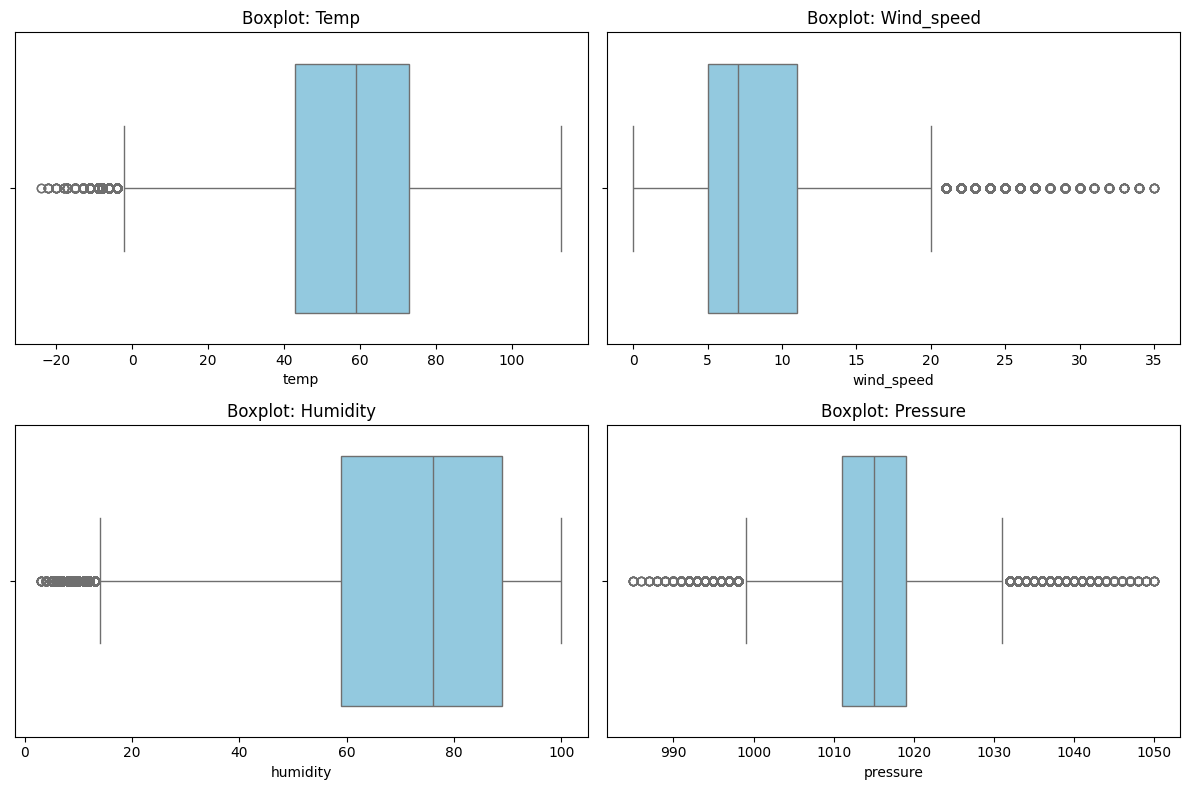

In [65]:
integer_columns = ['temp', 'wind_speed', 'humidity', 'pressure']

# Create subplots for each integer column
plt.figure(figsize=(12, 8))

for i, column in enumerate(integer_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=routes_weather_df[column], color='skyblue')
    plt.title(f'Boxplot: {column.capitalize()}')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

<details>
  <summary><b>Box Plot Analysis for Temperature, Wind Speed, Humidity, and Pressure</b></summary>

Analysis

  1. **Boxplot: Temperature**:
     - The temperature distribution has a wide range, with most values concentrated between 40°F and 80°F.
     - There are several low outliers below 0°F, indicating extreme cold temperatures, but the rest of the data follows a fairly consistent range.

  2. **Boxplot: Wind Speed**:
     - The wind speed distribution is mostly concentrated between 5 and 15 mph, with a few outliers extending beyond 20 mph.
     - The presence of these high wind speed outliers suggests occasional windy conditions that might need further investigation.

  3. **Boxplot: Humidity**:
     - The humidity distribution shows a central concentration between 60% and 100%, with lower values near 20-40% being outliers.
     - The majority of the data shows higher humidity, which may indicate humid environmental conditions for most of the dataset.

  4. **Boxplot: Pressure**:
     - The pressure distribution is tight, with values ranging mostly between 1000 and 1030 hPa.
     - There are several low and high outliers outside this range, but the majority of the data is tightly clustered around the median of approximately 1015-1020 hPa.

Recommendations

  1. **Temperature**:
     - The low outliers in temperature below 0°F should be reviewed to determine if they represent real extreme weather events or data errors.
     - Depending on the analysis goals, these outliers can be capped or removed if they do not add significant value to the model.

  2. **Wind Speed**:
     - Investigate the outliers above 20 mph to determine if they represent significant windy events (e.g., storms or gusty conditions).
     - Consider capping wind speed outliers to improve model performance, or keep them if modeling extreme conditions is relevant.

  3. **Humidity**:
     - The outliers below 40% humidity should be examined to confirm they are valid data points.
     - Given that most data is concentrated around high humidity levels, categorizing the humidity into bins (e.g., low, medium, high) might be useful to simplify the analysis.

  4. **Pressure**:
     - The outliers in pressure above and below the normal range can be treated or capped based on their significance to the analysis.
     - Since the majority of the data is tightly clustered, scaling or normalizing the pressure feature may help improve model accuracy.

  5. **General**:
     - Feature scaling (standardization or normalization) can help balance these variables, particularly for models that are sensitive to variations in magnitude.
     - Investigate potential relationships between these variables (e.g., temperature and wind speed) to create interaction terms or new features for machine learning models.
     - Consider transforming or binning skewed features to reduce the influence of outliers on predictive models.

</details>


In [66]:
import numpy as np
from scipy import stats

# Z-Score method to detect outliers
def z_score_outliers(column):
    z_scores = np.abs(stats.zscore(routes_weather_df[column]))
    outliers = routes_weather_df[z_scores > 3]
    return outliers

# IQR method to detect outliers
def iqr_outliers(column):
    Q1 = routes_weather_df[column].quantile(0.25)
    Q3 = routes_weather_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = routes_weather_df[(routes_weather_df[column] < lower_bound) | (routes_weather_df[column] > upper_bound)]
    return outliers

# Detecting outliers in 'age', 'experience', 'ratings', and 'average_speed_mph'
columns_to_check = ['temp', 'wind_speed', 'humidity', 'pressure']

outliers_z = {column: z_score_outliers(column) for column in columns_to_check}
outliers_iqr = {column: iqr_outliers(column) for column in columns_to_check}

# Displaying results
# pd.concat(outliers_z.values()).drop_duplicates()
pd.concat(outliers_iqr.values()).drop_duplicates()


,id,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder,event_time
126,96200,R-08d006da,2019-01-07 00:00:00+00:00,-11,5,Mist,0.0,95,3,1030,0,0,0,0,2024-09-19 00:00:00+00:00
232,170464,R-fc1a54c0,2019-01-11 00:00:00+00:00,-4,3,Moderate snow,0.0,99,3,1030,0,0,0,0,2024-09-19 00:00:00+00:00
477,144249,R-e14e48c8,2019-01-07 06:00:00+00:00,-8,4,Partly cloudy,0.0,94,4,1030,0,0,0,0,2024-09-19 00:00:00+00:00
1466,395798,R-d4444be3,2019-01-28 18:00:00+00:00,-6,2,Light snow,0.0,100,6,1028,0,0,0,0,2024-09-19 00:00:00+00:00
2244,183831,R-74abbc2c,2019-01-06 00:00:00+00:00,-4,4,Clear,0.0,79,6,1030,0,0,0,0,2024-09-19 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425598,341076,R-59c1a941,2019-01-27 18:00:00+00:00,48,11,Moderate or heavy rain shower,0.1,99,4,991,0,0,0,0,2024-09-19 00:00:00+00:00
425674,188827,R-16a3bb1a,2019-01-01 06:00:00+00:00,59,11,Moderate or heavy rain shower,0.1,95,4,996,0,0,0,0,2024-09-19 00:00:00+00:00
425679,276724,R-c448ec95,2019-01-26 18:00:00+00:00,46,9,Light drizzle,0.0,93,1,996,0,0,0,0,2024-09-19 00:00:00+00:00
425698,30702,R-d074d446,2019-01-18 00:00:00+00:00,7,6,Sunny,0.0,82,6,1034,0,0,0,0,2024-09-19 00:00:00+00:00


In [67]:
routes_weather_df = routes_weather_df.drop(pd.concat(outliers_iqr.values()).drop_duplicates().index)

# Feature Store Update

In [17]:
df_dict = {
    'city_weather': city_weather_df,
    'drivers_table': drivers_df,
    'routes_table': routes_df,
    'routes_weather': routes_weather_df,
    'traffic_table': traffic_df,
    'truck_schedule_table': truck_schedule_df,
    'trucks_table': trucks_df,
}

In [18]:
from components.fg_ingestion import fgIngestion

fgIngestion_obj = fgIngestion()
# project = fgIngestion_obj.hopswork_login()
# fs = project.get_feature_store()


Connection to PostgreSQL successful


In [19]:
fgIngestion_obj.process_feature_groups(fs, 2, df_dict)

Feature group 'city_weather_fg' already exists. Skipping creation and insertion.
Feature group 'drivers_table_fg' already exists. Skipping creation and insertion.
Feature group 'routes_table_fg' already exists. Skipping creation and insertion.
Feature group 'routes_weather_fg' already exists. Skipping creation and insertion.
Feature group 'traffic_table_fg' not found. Creating a new feature group. Error: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/1022104/featurestores/1013831/featuregroups/traffic_table_fg). Server response: 
HTTP code: 404, HTTP reason: Not Found, body: b'{"errorCode":270009,"usrMsg":"feature group name: traffic_table_fg feature group version: 2","errorMsg":"Featuregroup wasn\'t found."}', error code: 270009, error msg: Featuregroup wasn't found., user msg: feature group name: traffic_table_fg feature group version: 2
Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1022104/fs/1013831/fg/1227

Uploading Dataframe: 0.00% |          | Rows 0/2597913 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: traffic_table_fg_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1022104/jobs/named/traffic_table_fg_2_offline_fg_materialization/executions
Inserted data into new feature group: traffic_table_fg
Feature group 'truck_schedule_table_fg' already exists. Skipping creation and insertion.
Feature group 'trucks_table_fg' already exists. Skipping creation and insertion.


In [16]:
feature_group = fs.get_feature_group('traffic_table_fg', version=2)

# Delete the feature group
feature_group.delete()

2024-09-26 23:52:20,741 WARNING: JobWarning: All jobs associated to feature group `traffic_table_fg`, version `2` will be removed.

